In [23]:
import os

import pandas as pd

from protest_impact.util import project_root

dfs = [
    pd.read_csv(x, sep=";")
    for x in sorted((project_root / "data/regions/sources").glob("*.csv"))
]

In [24]:
# extend the pandas columns to 200

data = {}
for df in dfs:
    name = df.columns[1]
    # drop the first column
    df = df.drop(columns=df.columns[0])
    # make the second row the column names
    df.columns = df.iloc[1]
    # drop the first two rows
    df = df.drop(index=[0, 1])
    # make the first column the index
    df = df.set_index(df.columns[0]).rename_axis(None, axis=1)
    data[name] = df
# merge the dataframes
df = pd.concat(data, axis=1)
# remove the second level of column names
df.columns = df.columns.droplevel(1)
# drop rows 16-end
df = df.iloc[:16]
df = df.apply(pd.to_numeric, errors="coerce").fillna(0)
df_original = df.copy()
# display all columns
pd.set_option("display.max_columns", None)
df

Anteil Personen mit MHG 0 bis 19 Jahre (%)  \
Schleswig-Holstein                                            16.4   
Hamburg                                                       39.8   
Niedersachsen                                                 23.4   
Bremen                                                        39.7   
Nordrhein-Westfalen                                           33.2   
Hessen                                                        33.9   
Rheinland-Pfalz                                               26.9   
Baden-Württemberg                                             31.8   
Bayern                                                        24.7   
Saarland                                                      23.7   
Berlin                                                        38.0   
Brandenburg                                                    8.0   
Mecklenburg-Vorpommern                                         6.4   
Sachsen                                                        7.9   
Sachsen-Anhalt                                                 7.0   
Thüringen                                                      6.1   

                        Anteil Personen mit MHG 60 Jahre und älter (%)  \
Schleswig-Holstein                                                 5.9   
Hamburg                                                           14.3   
Niedersachsen                                                      8.3   
Bremen                                                            13.0   
Nordrhein-Westfalen                                               13.0   
Hessen                                                            13.2   
Rheinland-Pfalz                                                    9.4   
Baden-Württemberg                                                 15.3   
Bayern                                                            11.0   
Saarland                                                           8.3   
Berlin                                                            11.1   
Brandenburg                                                        2.4   
Mecklenburg-Vorpommern                                             2.1   
Sachsen                                                            1.9   
Sachsen-Anhalt                                                     1.8   
Thüringen                                                          1.6   

                        Erwerbstätigenquote Frauen (%)  \
Schleswig-Holstein                                71.2   
Hamburg                                           72.5   
Niedersachsen                                     70.1   
Bremen                                            67.6   
Nordrhein-Westfalen                               67.6   
Hessen                                            70.5   
Rheinland-Pfalz                                   71.3   
Baden-Württemberg                                 73.5   
Bayern                                            74.2   
Saarland                                          66.8   
Berlin                                            68.5   
Brandenburg                                       75.6   
Mecklenburg-Vorpommern                            72.6   
Sachsen                                           74.9   
Sachsen-Anhalt                                    72.0   
Thüringen                                         74.6   

                        Erwerbstätigenquote Männer (%)  \
Schleswig-Holstein                                79.8   
Hamburg                                           78.5   
Niedersachsen                                     79.6   
Bremen                                            74.2   
Nordrhein-Westfalen                               77.8   
Hessen                                            80.0   
Rheinland-Pfalz                                   81.0   
Baden-Württemberg                                 82.6   
Bayern                                            83.6   
Saarlan

In [25]:
df.T.to_csv(project_root / "data/regions/socioeconomic-indicators.csv")

In [26]:
for col in sorted(df.columns):
    print(col)

Anteil Einpersonenhaushalte (%)
Anteil Personen mit MHG 0 bis 19 Jahre (%)
Anteil Personen mit MHG 60 Jahre und älter (%)
Anteil Schulabgänger/-innen mit allgem. Hochschulreife (%)
Anteil Schulabgänger/-innen ohne Hauptschulabschluss (%)
Anteil der ausländischen Bevölkerung  an der Gesamtbevölkerung (%)
Arbeitslosenquote (%)
Armutsgefährdungsquote (Bundesmedian) (%)
BIP je Erwerbstätigen (EUR)
Bevölkerung 0 bis 17 Jahre (%)
Bevölkerung 65 Jahre und älter (%)
Bevölkerungsdichte (EW je qkm)
Durchschnittsalter der Bevölkerung
Elterngeldbezug Vater (%)
Erwerbstätigenquote Frauen (%)
Erwerbstätigenquote Männer (%)
Gewerbeanmeldungen je 10.000 EW
Haushalte mit Kindern (%)
Pkw-Bestand je 1.000 EW am 01.01.
Verfügbares Einkommen je EW (EUR)
Wahlbeteiligung, Bundestagswahl (%)
Wahlbeteiligung, Europawahl (%)
Wanderungssaldo je 10.000 EW
Zweitstimmenanteil AfD, Bundestagswahl (%)
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)
Zweitstimmenanteil DIE LINKE, Bundestagswahl (%)
Zweitstimmenanteil FD

In [27]:
df.mean(axis=0)

Anteil Personen mit MHG 0 bis 19 Jahre (%)                               22.93125
Anteil Personen mit MHG 60 Jahre und älter (%)                            8.28750
Erwerbstätigenquote Frauen (%)                                           71.46875
Erwerbstätigenquote Männer (%)                                           78.61875
Anteil Einpersonenhaushalte (%)                                          38.06250
Haushalte mit Kindern (%)                                                31.36250
Elterngeldbezug Vater (%)                                                33.16250
Wahlbeteiligung, Europawahl (%)                                          61.26250
Verfügbares Einkommen je EW (EUR)                                     22979.18750
BIP je Erwerbstätigen (EUR)                                           71880.25000
Armutsgefährdungsquote (Bundesmedian) (%)                                17.95000
Bevölkerungsdichte (EW je qkm)                                          691.79375
Anteil der auslä

In [28]:
# standardize using sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df

Anteil Personen mit MHG 0 bis 19 Jahre (%)  \
Schleswig-Holstein                                       -0.531194   
Hamburg                                                   1.371955   
Niedersachsen                                             0.038124   
Bremen                                                    1.363822   
Nordrhein-Westfalen                                       0.835169   
Hessen                                                    0.892101   
Rheinland-Pfalz                                           0.322783   
Baden-Württemberg                                         0.721306   
Bayern                                                    0.143854   
Saarland                                                  0.062523   
Berlin                                                    1.225559   
Brandenburg                                              -1.214376   
Mecklenburg-Vorpommern                                   -1.344506   
Sachsen                                                  -1.222509   
Sachsen-Anhalt                                           -1.295707   
Thüringen                                                -1.368905   

                        Anteil Personen mit MHG 60 Jahre und älter (%)  \
Schleswig-Holstein                                           -0.492087   
Hamburg                                                       1.239234   
Niedersachsen                                                 0.002576   
Bremen                                                        0.971291   
Nordrhein-Westfalen                                           0.971291   
Hessen                                                        1.012513   
Rheinland-Pfalz                                               0.229297   
Baden-Württemberg                                             1.445344   
Bayern                                                        0.559072   
Saarland                                                      0.002576   
Berlin                                                        0.579683   
Brandenburg                                                  -1.213470   
Mecklenburg-Vorpommern                                       -1.275303   
Sachsen                                                      -1.316525   
Sachsen-Anhalt                                               -1.337136   
Thüringen                                                    -1.378358   

                        Erwerbstätigenquote Frauen (%)  \
Schleswig-Holstein                           -0.099676   
Hamburg                                       0.382479   
Niedersachsen                                -0.507654   
Bremen                                       -1.434875   
Nordrhein-Westfalen                          -1.434875   
Hessen                                       -0.359298   
Rheinland-Pfalz                              -0.062587   
Baden-Württemberg                             0.753367   
Bayern                                        1.012989   
Saarland                                     -1.731585   
Berlin                                       -1.101075   
Brandenburg                                   1.532233   
Mecklenburg-Vorpommern                        0.419568   
Sachsen                                       1.272611   
Sachsen-Anhalt                                0.197034   
Thüringen                                     1.161344   

                        Erwerbstätigenquote Männer (%)  \
Schleswig-Holstein                            0.419038   
Hamburg                                      -0.042125   
Niedersachsen                                 0.348090   
Bremen                                       -1.567512   
Nordrhein-Westfalen                          -0.290444   
Hessen                                        0.489986   
Rheinland-Pfalz                               0.844727   
Baden-Württemberg                             1.412313   
Bayern                                        1.767054   
Saarlan

In [29]:
# switch columns and rows
df = df.T
df

Schleswig-Holstein  \
Anteil Personen mit MHG 0 bis 19 Jahre (%)                   -0.531194   
Anteil Personen mit MHG 60 Jahre und älter (%)               -0.492087   
Erwerbstätigenquote Frauen (%)                               -0.099676   
Erwerbstätigenquote Männer (%)                                0.419038   
Anteil Einpersonenhaushalte (%)                              -0.433076   
Haushalte mit Kindern (%)                                     0.118914   
Elterngeldbezug Vater (%)                                    -0.612276   
Wahlbeteiligung, Europawahl (%)                              -0.568000   
Verfügbares Einkommen je EW (EUR)                             0.776609   
BIP je Erwerbstätigen (EUR)                                  -0.339864   
Armutsgefährdungsquote (Bundesmedian) (%)                    -0.713885   
Bevölkerungsdichte (EW je qkm)                               -0.467132   
Anteil der ausländischen Bevölkerung  an der Ge...           -0.577445   
Wanderungssaldo je 10.000 EW                                  1.207066   
Bevölkerung 0 bis 17 Jahre (%)                               -0.008736   
Bevölkerung 65 Jahre und älter (%)                            0.141955   
Durchschnittsalter der Bevölkerung                            0.195925   
Anteil Schulabgänger/-innen mit allgem. Hochsch...            0.176209   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...            0.476884   
Gewerbeanmeldungen je 10.000 EW                               0.521368   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)                0.216413   
Zweitstimmenanteil SPD, Bundestagswahl (%)                    0.159458   
Zweitstimmenanteil FDP, Bundestagswahl (%)                    0.969668   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)                  0.729700   
Zweitstimmenanteil DIE LINKE, Bundestagswahl (%)             -0.988181   
Wahlbeteiligung, Bundestagswahl (%)                           0.910498   
Zweitstimmenanteil AfD, Bundestagswahl (%)                   -0.836461   
Arbeitslosenquote (%)                                        -0.454674   
Pkw-Bestand je 1.000 EW am 01.01.                             0.412188   

                                                     Hamburg  Niedersachsen  \
Anteil Personen mit MHG 0 bis 19 Jahre (%)          1.371955       0.038124   
Anteil Personen mit MHG 60 Jahre und älter (%)      1.239234       0.002576   
Erwerbstätigenquote Frauen (%)                      0.382479      -0.507654   
Erwerbstätigenquote Männer (%)                     -0.042125       0.348090   
Anteil Einpersonenhaushalte (%)                     1.884018      -0.719954   
Haushalte mit Kindern (%)                          -1.593442       0.825600   
Elterngeldbezug Vater (%)                           0.673300      -0.205448   
Wahlbeteiligung, Europawahl (%)                     0.231744       0.086336   
Verfügbares Einkommen je EW (EUR)                   1.424807      -0.063144   
BIP je Erwerbstätigen (EUR)                         2.335609       0.159538   
Armutsgefährdungsquote (Bundesmedian) (%)          -0.136701       0.106323   
Bevölkerungsdichte (EW je qkm)                      1.625174      -0.482522   
Anteil der ausländischen Bevölkerung  an der Ge...  1.052989      -0.305706   
Wanderungssaldo je 10.000 EW                       -1.409138       0.626421   
Bevölkerung 0 bis 17 Jahre (%)                      0.969700       0.690147   
Bevölkerung 65 Jahre und älter (%)                 -1.738945      -0.212932   
Durchschnittsalter der Bevölkerung                 -1.728951      -0.244047   
Anteil Schulabgänger/-innen mit allgem. Hochsch...  2.908811      -0.358744   
Anteil Schulabgänger/-innen ohne Hauptschulabsc... -0.831140      -0.758472   
Gewerbeanmeldungen je 10.000 EW                     1.418034      -0.005062   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)     -1.220899       0.695518   
Zweitstimmenanteil SPD, Bundestagswahl (%)          0.503684       1.192138   
Zweitstimmenan

In [8]:
df.to_csv(project_root / "data/regions/socioeconomic-indicators-standardized.csv")

### Linear regression

In [59]:
import numpy as np

# for each column, perform linear regression to predict the column from the other columns
# and store the coefficients
from sklearn.linear_model import LinearRegression

coefficients = {}
for i, column in enumerate(df.columns):
    X = df.drop(columns=column)
    y = df[column]
    coef_model = LinearRegression(fit_intercept=False, positive=True).fit(X, y)
    coefficients[column] = coef_model.coef_
    # insert 0 for the coefficient of the column itself
    coefficients[column] = np.insert(coefficients[column], i, 0)
coefficients

{'Schleswig-Holstein': array([0.        , 0.11250781, 0.11030637, 0.        , 0.10680821,
        0.07770769, 0.59002452, 0.11598781, 0.04501781, 0.        ,
        0.09191609, 0.33764693, 0.        , 0.        , 0.22320388,
        0.        ]),
 'Hamburg': array([0.4019528 , 0.        , 0.        , 0.93219762, 0.25991235,
        0.        , 0.        , 0.81808078, 0.46413204, 0.15819381,
        0.69938052, 1.18951682, 0.        , 0.        , 0.        ,
        0.        ]),
 'Niedersachsen': array([0.07695075, 0.        , 0.        , 0.17230005, 0.40066066,
        0.32589667, 0.53370466, 0.        , 0.13348335, 0.        ,
        0.02018772, 0.38841371, 0.23424439, 0.        , 0.        ,
        0.        ]),
 'Bremen': array([0.        , 0.77835167, 0.28044681, 0.        , 1.22331183,
        0.59198831, 1.18383804, 0.        , 0.        , 0.23466536,
        0.91685754, 0.        , 0.        , 0.42731752, 1.11919714,
        0.57974387]),
 'Nordrhein-Westfalen': array([0.147

In [60]:
pd.DataFrame(coefficients)

Schleswig-Holstein   Hamburg  Niedersachsen    Bremen  \
0             0.000000  0.401953       0.076951  0.000000   
1             0.112508  0.000000       0.000000  0.778352   
2             0.110306  0.000000       0.000000  0.280447   
3             0.000000  0.932198       0.172300  0.000000   
4             0.106808  0.259912       0.400661  1.223312   
5             0.077708  0.000000       0.325897  0.591988   
6             0.590025  0.000000       0.533705  1.183838   
7             0.115988  0.818081       0.000000  0.000000   
8             0.045018  0.464132       0.133483  0.000000   
9             0.000000  0.158194       0.000000  0.234665   
10            0.091916  0.699381       0.020188  0.916858   
11            0.337647  1.189517       0.388414  0.000000   
12            0.000000  0.000000       0.234244  0.000000   
13            0.000000  0.000000       0.000000  0.427318   
14            0.223204  0.000000       0.000000  1.119197   
15            0.000000  0.000000       0.000000  0.579744   

    Nordrhein-Westfalen    Hessen  Rheinland-Pfalz  Baden-Württemberg  \
0              0.147521  0.084112         0.447822           0.017188   
1              0.050736  0.121400         0.070998           0.259680   
2              0.438186  0.444962         0.391361           0.000000   
3              0.255517  0.329880         0.333088           0.000000   
4              0.000000  0.345461         0.120378           0.040443   
5              0.231512  0.000000         0.000000           1.087121   
6              0.022790  0.000000         0.000000           0.991637   
7              0.000000  0.741909         0.406262           0.000000   
8              0.172768  0.311446         0.220034           0.216634   
9              0.266280  0.155580         0.388348           0.012724   
10             0.096029  0.184928         0.000000           0.115866   
11             0.000000  0.369745         0.261392           0.000000   
12             0.000000  0.000000         0.000000           0.000000   
13             0.000000  0.000000         0.000000           0.684927   
14             0.003632  0.413107         0.000000           0.093855   
15             0.000000  0.000000         0.303529           0.000000   

      Bayern  Saarland    Berlin  Brandenburg  Mecklenburg-Vorpommern  \
0   0.139138  0.000000  0.000000     0.525834                0.200646   
1   0.032419  0.000000  0.797195     0.946086                0.000000   
2   0.245337  0.000000  0.000000     0.846631                0.144040   
3   0.000000  0.028800  0.463029     0.000000                0.378587   
4   0.084072  0.719646  0.085337     0.375994                0.140440   
5   0.262103  0.000000  0.000000     1.009819                0.000000   
6   0.000000  1.192679  0.000000     0.858478                0.041549   
7   0.804866  0.000000  0.000000     0.242904                0.112909   
8   0.000000  0.000000  0.133318     0.375762                0.200759   
9   0.000000  0.000000  0.000000     0.343478                0.303771   
10  0.088046  0.146875  0.000000     0.409719                0.258289   
11  0.209099  0.000000  0.000000     0.000000                0.916852   
12  0.000000  0.598401  0.502510     1.942520                0.000000   
13  0.000000  0.000000  0.160005     0.869920                0.051194   
14  0.000000  0.000000  0.000000     0.000000                0.654191   
15  0.248081  0.260202  0.000000     0.711205                0.132088   

     Sachsen  Sachsen-Anhalt  Thüringen  
0   0.484165        0.289893   0.000000  
1   0.044623        0.000000   0.000000  
2   0.000000        0.000000   0.000000  
3   0.100953        0.396007   0.396272  
4   0.000000        0.130872   0.000000  
5   0.000000        0.507918   0.164815  
6   0.000000        0.000000   0.131786  
7   0.382323        0.229613   0.000000  
8   0.000000        0.221452   0.339585  
9   0.012972        0.014716   0.273558  
10  0.265000        

In [63]:
pd.DataFrame(coefficients).mean()

Schleswig-Holstein        0.113195
Hamburg                   0.307710
Niedersachsen             0.142865
Bremen                    0.458482
Nordrhein-Westfalen       0.105311
Hessen                    0.218908
Rheinland-Pfalz           0.183951
Baden-Württemberg         0.220005
Bayern                    0.132073
Saarland                  0.184163
Berlin                    0.133837
Brandenburg               0.591147
Mecklenburg-Vorpommern    0.220957
Sachsen                   0.160654
Sachsen-Anhalt            0.233342
Thüringen                 0.192647
dtype: float64

In [18]:
# make a matrix of the coefficients and display it
coefficients = pd.DataFrame(coefficients, index=df.columns)
coefficients

Schleswig-Holstein   Hamburg  Niedersachsen    Bremen  \
Schleswig-Holstein                0.000000  0.401953       0.076951  0.000000   
Hamburg                           0.112508  0.000000       0.000000  0.778352   
Niedersachsen                     0.110306  0.000000       0.000000  0.280447   
Bremen                            0.000000  0.932198       0.172300  0.000000   
Nordrhein-Westfalen               0.106808  0.259912       0.400661  1.223312   
Hessen                            0.077708  0.000000       0.325897  0.591988   
Rheinland-Pfalz                   0.590025  0.000000       0.533705  1.183838   
Baden-Württemberg                 0.115988  0.818081       0.000000  0.000000   
Bayern                            0.045018  0.464132       0.133483  0.000000   
Saarland                          0.000000  0.158194       0.000000  0.234665   
Berlin                            0.091916  0.699381       0.020188  0.916858   
Brandenburg                       0.337647  1.189517       0.388414  0.000000   
Mecklenburg-Vorpommern            0.000000  0.000000       0.234244  0.000000   
Sachsen                           0.000000  0.000000       0.000000  0.427318   
Sachsen-Anhalt                    0.223204  0.000000       0.000000  1.119197   
Thüringen                         0.000000  0.000000       0.000000  0.579744   

                        Nordrhein-Westfalen    Hessen  Rheinland-Pfalz  \
Schleswig-Holstein                 0.147521  0.084112         0.447822   
Hamburg                            0.050736  0.121400         0.070998   
Niedersachsen                      0.438186  0.444962         0.391361   
Bremen                             0.255517  0.329880         0.333088   
Nordrhein-Westfalen                0.000000  0.345461         0.120378   
Hessen                             0.231512  0.000000         0.000000   
Rheinland-Pfalz                    0.022790  0.000000         0.000000   
Baden-Württemberg                  0.000000  0.741909         0.406262   
Bayern                             0.172768  0.311446         0.220034   
Saarland                           0.266280  0.155580         0.388348   
Berlin                             0.096029  0.184928         0.000000   
Brandenburg                        0.000000  0.369745         0.261392   
Mecklenburg-Vorpommern             0.000000  0.000000         0.000000   
Sachsen                            0.000000  0.000000         0.000000   
Sachsen-Anhalt                     0.003632  0.413107         0.000000   
Thüringen                          0.000000  0.000000         0.303529   

                        Baden-Württemberg    Bayern  Saarland    Berlin  \
Schleswig-Holstein               0.017188  0.139138  0.000000  0.000000   
Hamburg                          0.259680  0.032419  0.000000  0.797195   
Niedersachsen                    0.000000  0.245337  0.000000  0.000000   
Bremen                           0.000000  0.000000  0.028800  0.463029   
Nordrhein-Westfalen              0.040443  0.084072  0.719646  0.085337   
Hessen                           1.087121  0.262103  0.000000  0.000000   
Rheinland-Pfalz                  0.991637  0.000000  1.192679  0.000000   
Baden-Württemberg                0.000000  0.804866  0.000000  0.000000   
Bayern                           0.216634  0.000000  0.000000  0.133318   
Saarland                         0.012724  0.000000  0.000000  0.000000   
Berlin                           0.115866  0.088046  0.146875  0.000000   
Brandenburg                      0.000000  0.209099  0.000000  0.000000   
Mecklenburg-Vorpommern           0.000000  0.000000  0.598401  0.502510   
Sachsen                          0.684927  0.000000  0.000000  0.160005   
Sachsen-Anhalt                   0.093855  0.000000  0.000000  0.000000   
Thüringen                        0.000000  0.248081  0.260202  0.000000   

                        Brandenburg  Mecklenburg-Vorpommern   Sachsen  \
Schleswig-Holstein         0.525834   

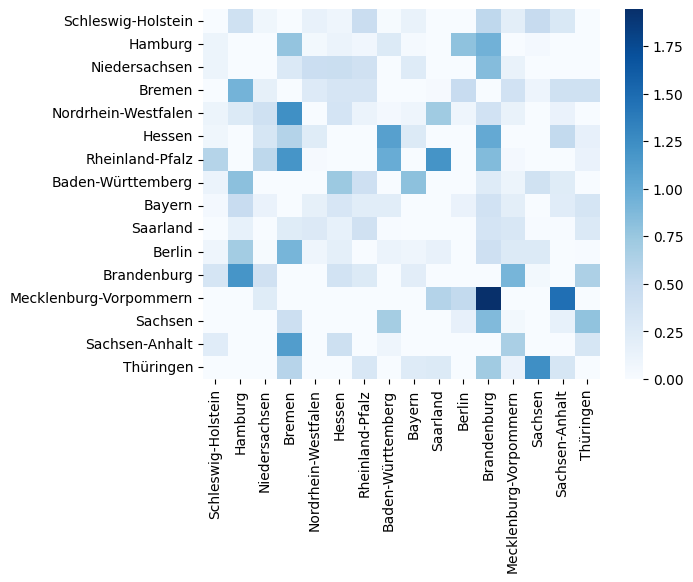

In [19]:
import matplotlib.pyplot as plt

# display the matrix as a heatmap
import seaborn as sns

sns.heatmap(coefficients, cmap="Blues")
plt.show()

In [20]:
import json

dic = coefficients.to_dict()
with open(
    project_root / "data/regions/socioeconomic-regression-weights.json", "w"
) as f:
    json.dump(dic, f, indent=4, ensure_ascii=False)

### Similarity matrix

In [21]:
df

Schleswig-Holstein  \
Anteil Personen mit MHG 0 bis 19 Jahre (%)                   -0.531194   
Anteil Personen mit MHG 60 Jahre und älter (%)               -0.492087   
Erwerbstätigenquote Frauen (%)                               -0.099676   
Erwerbstätigenquote Männer (%)                                0.419038   
Anteil Einpersonenhaushalte (%)                              -0.433076   
Haushalte mit Kindern (%)                                     0.118914   
Elterngeldbezug Vater (%)                                    -0.612276   
Wahlbeteiligung, Europawahl (%)                              -0.568000   
Verfügbares Einkommen je EW (EUR)                             0.776609   
BIP je Erwerbstätigen (EUR)                                  -0.339864   
Armutsgefährdungsquote (Bundesmedian) (%)                    -0.713885   
Bevölkerungsdichte (EW je qkm)                               -0.467132   
Anteil der ausländischen Bevölkerung  an der Ge...           -0.577445   
Wanderungssaldo je 10.000 EW                                  1.207066   
Bevölkerung 0 bis 17 Jahre (%)                               -0.008736   
Bevölkerung 65 Jahre und älter (%)                            0.141955   
Durchschnittsalter der Bevölkerung                            0.195925   
Anteil Schulabgänger/-innen mit allgem. Hochsch...            0.176209   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...            0.476884   
Gewerbeanmeldungen je 10.000 EW                               0.521368   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)                0.216413   
Zweitstimmenanteil SPD, Bundestagswahl (%)                    0.159458   
Zweitstimmenanteil FDP, Bundestagswahl (%)                    0.969668   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)                  0.729700   
Zweitstimmenanteil DIE LINKE, Bundestagswahl (%)             -0.988181   
Wahlbeteiligung, Bundestagswahl (%)                           0.910498   
Zweitstimmenanteil AfD, Bundestagswahl (%)                   -0.836461   
Arbeitslosenquote (%)                                        -0.454674   
Pkw-Bestand je 1.000 EW am 01.01.                             0.412188   

                                                     Hamburg  Niedersachsen  \
Anteil Personen mit MHG 0 bis 19 Jahre (%)          1.371955       0.038124   
Anteil Personen mit MHG 60 Jahre und älter (%)      1.239234       0.002576   
Erwerbstätigenquote Frauen (%)                      0.382479      -0.507654   
Erwerbstätigenquote Männer (%)                     -0.042125       0.348090   
Anteil Einpersonenhaushalte (%)                     1.884018      -0.719954   
Haushalte mit Kindern (%)                          -1.593442       0.825600   
Elterngeldbezug Vater (%)                           0.673300      -0.205448   
Wahlbeteiligung, Europawahl (%)                     0.231744       0.086336   
Verfügbares Einkommen je EW (EUR)                   1.424807      -0.063144   
BIP je Erwerbstätigen (EUR)                         2.335609       0.159538   
Armutsgefährdungsquote (Bundesmedian) (%)          -0.136701       0.106323   
Bevölkerungsdichte (EW je qkm)                      1.625174      -0.482522   
Anteil der ausländischen Bevölkerung  an der Ge...  1.052989      -0.305706   
Wanderungssaldo je 10.000 EW                       -1.409138       0.626421   
Bevölkerung 0 bis 17 Jahre (%)                      0.969700       0.690147   
Bevölkerung 65 Jahre und älter (%)                 -1.738945      -0.212932   
Durchschnittsalter der Bevölkerung                 -1.728951      -0.244047   
Anteil Schulabgänger/-innen mit allgem. Hochsch...  2.908811      -0.358744   
Anteil Schulabgänger/-innen ohne Hauptschulabsc... -0.831140      -0.758472   
Gewerbeanmeldungen je 10.000 EW                     1.418034      -0.005062   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)     -1.220899       0.695518   
Zweitstimmenanteil SPD, Bundestagswahl (%)          0.503684       1.192138   
Zweitstimmenan

In [22]:
# calculate distances between each pair of columns
from scipy.spatial.distance import pdist, squareform

# we can use different metrics, e.g. euclidean, cosine, etc.
distances = squareform(pdist(df.T, metric="cosine"))
# normalize the distances to be between 0 and 1
distances = (distances - distances.min()) / (distances.max() - distances.min())
# 0 should mean dissimilar, 1 should mean similar
distances = 1 - distances
# set the diagonal to 0
np.fill_diagonal(distances, 0)
distances = pd.DataFrame(distances, index=df.columns, columns=df.columns)
distances

Schleswig-Holstein   Hamburg  Niedersachsen    Bremen  \
Schleswig-Holstein                0.000000  0.365981       0.660305  0.168807   
Hamburg                           0.365981  0.000000       0.338819  0.689766   
Niedersachsen                     0.660305  0.338819       0.000000  0.316259   
Bremen                            0.168807  0.689766       0.316259  0.000000   
Nordrhein-Westfalen               0.483670  0.622611       0.725460  0.632781   
Hessen                            0.538422  0.594187       0.690988  0.431966   
Rheinland-Pfalz                   0.702601  0.338125       0.799081  0.237475   
Baden-Württemberg                 0.594395  0.550646       0.591578  0.253720   
Bayern                            0.599731  0.482153       0.610707  0.134887   
Saarland                          0.464759  0.229981       0.586526  0.399058   
Berlin                            0.226200  0.821034       0.209548  0.797170   
Brandenburg                       0.546399  0.192275       0.420238  0.098359   
Mecklenburg-Vorpommern            0.380391  0.108831       0.312444  0.397037   
Sachsen                           0.372881  0.193588       0.147767  0.261688   
Sachsen-Anhalt                    0.375047  0.078986       0.293340  0.422043   
Thüringen                         0.312767  0.081845       0.237611  0.261912   

                        Nordrhein-Westfalen    Hessen  Rheinland-Pfalz  \
Schleswig-Holstein                 0.483670  0.538422         0.702601   
Hamburg                            0.622611  0.594187         0.338125   
Niedersachsen                      0.725460  0.690988         0.799081   
Bremen                             0.632781  0.431966         0.237475   
Nordrhein-Westfalen                0.000000  0.755067         0.649572   
Hessen                             0.755067  0.000000         0.634540   
Rheinland-Pfalz                    0.649572  0.634540         0.000000   
Baden-Württemberg                  0.592141  0.846288         0.760691   
Bayern                             0.529687  0.764723         0.693742   
Saarland                           0.572945  0.353572         0.685429   
Berlin                             0.525985  0.399213         0.111565   
Brandenburg                        0.074808  0.144512         0.367901   
Mecklenburg-Vorpommern             0.128319  0.040668         0.197125   
Sachsen                            0.000000  0.090694         0.281900   
Sachsen-Anhalt                     0.154152  0.156173         0.204420   
Thüringen                          0.006909  0.081162         0.300437   

                        Baden-Württemberg    Bayern  Saarland    Berlin  \
Schleswig-Holstein               0.594395  0.599731  0.464759  0.226200   
Hamburg                          0.550646  0.482153  0.229981  0.821034   
Niedersachsen                    0.591578  0.610707  0.586526  0.209548   
Bremen                           0.253720  0.134887  0.399058  0.797170   
Nordrhein-Westfalen              0.592141  0.529687  0.572945  0.525985   
Hessen                           0.846288  0.764723  0.353572  0.399213   
Rheinland-Pfalz                  0.760691  0.693742  0.685429  0.111565   
Baden-Württemberg                0.000000  0.869979  0.338966  0.289745   
Bayern                           0.869979  0.000000  0.299651  0.275879   
Saarland                         0.338966  0.299651  0.000000  0.255177   
Berlin                           0.289745  0.275879  0.255177  0.000000   
Brandenburg                      0.232388  0.359759  0.459388  0.237305   
Mecklenburg-Vorpommern           0.002134  0.105694  0.539891  0.355233   
Sachsen                          0.330676  0.364847  0.358729  0.313862   
Sachsen-Anhalt                   0.101007  0.175339  0.478096  0.293033   
Thüringen                        0.218126  0.304426  0.471936  0.228995   

                        Brandenburg  Mecklenburg-Vorpommern   Sachsen  \
Schleswig-Holstein         0.546399   

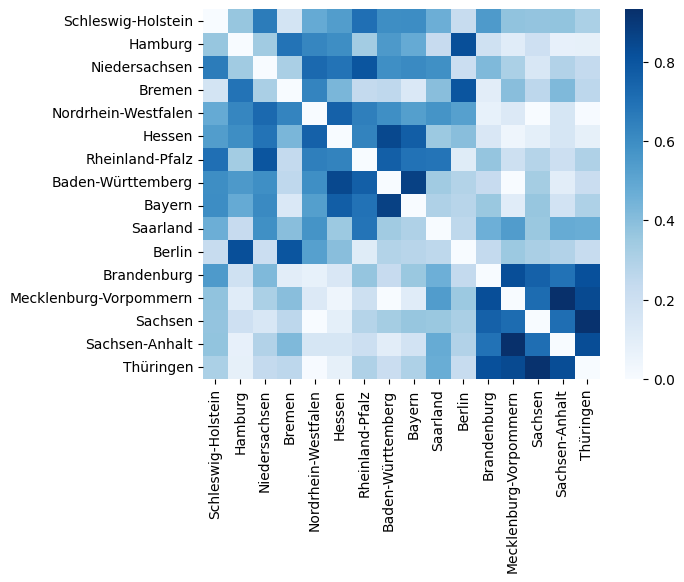

In [24]:
# visualize the distances as a heatmap
sns.heatmap(distances, cmap="Blues")
plt.show()

In [25]:
# convert to a dictionary and save to json
dic = distances.to_dict()
# make the weights sum to 1 for each region
dic = {k: {k2: v2 / sum(v.values()) for k2, v2 in v.items()} for k, v in dic.items()}
import json

with open(
    project_root / "data/regions/socioeconomic-similarity-weights.json", "w"
) as f:
    json.dump(dic, f, indent=4, ensure_ascii=False)

### Correlation

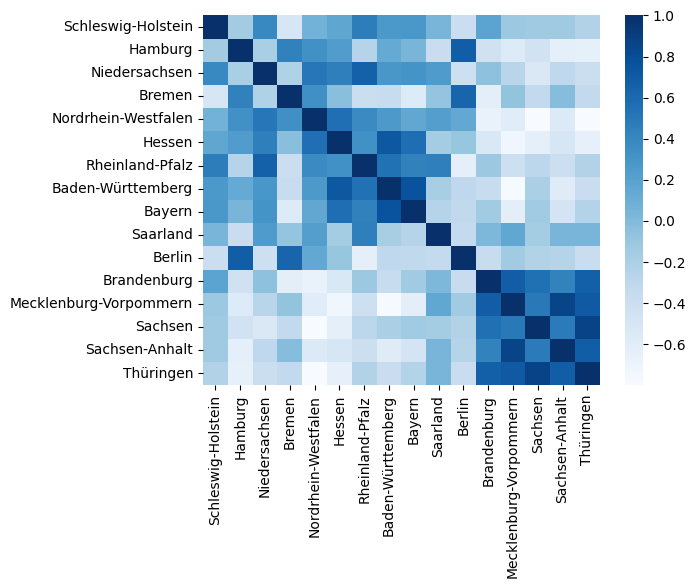

In [26]:
# get correlation matrix for the columns of df
correlations = df.corr()

# visualize the correlations as a heatmap
sns.heatmap(correlations, cmap="Blues")
plt.show()

### PCA regression

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(df)

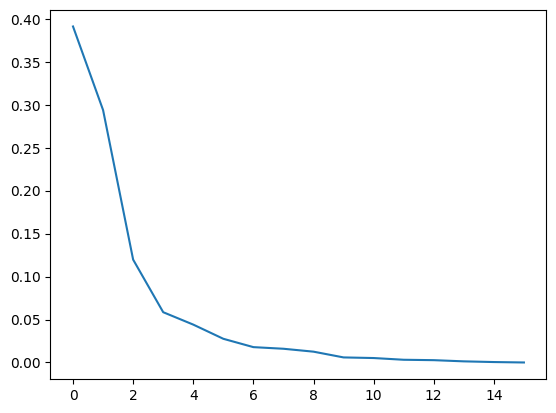

In [28]:
# visualize the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

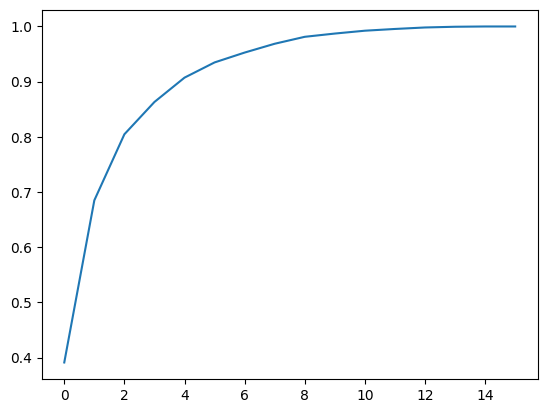

In [29]:
# visualize the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))

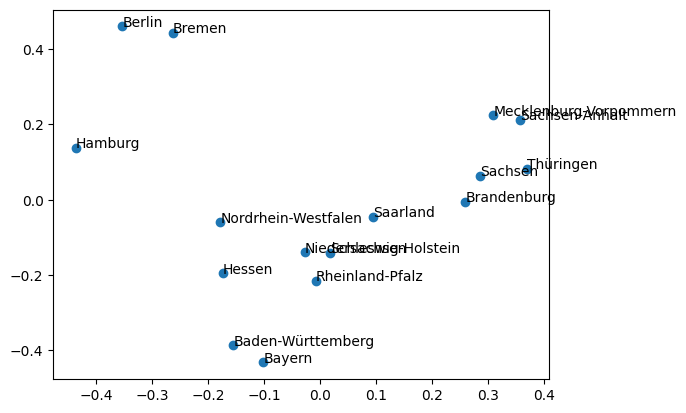

In [30]:
# visualize the regions and their coordinates in the first two principal components
plt.scatter(pca.components_[0], pca.components_[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (pca.components_[0][i], pca.components_[1][i]))
plt.show()

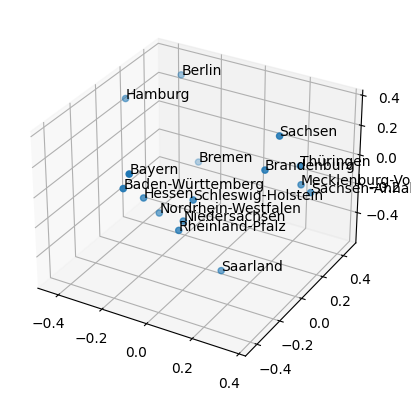

In [31]:
# make a 3d plot of the first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca.components_[0], pca.components_[1], pca.components_[2])
for i, txt in enumerate(df.columns):
    ax.text(
        pca.components_[0][i],
        pca.components_[1][i],
        pca.components_[2][i],
        txt,
    )
plt.show()

In [70]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


def pc_regression(X, Y, regressor, k):
    pca = PCA()
    X_pca = pca.fit_transform(X)
    X_pca_selected = X_pca[:, :k]
    regressor.fit(X_pca_selected, Y)
    coefficients = regressor.coef_
    original_coefficients = np.dot(pca.components_[:k, :].T, coefficients)
    return original_coefficients

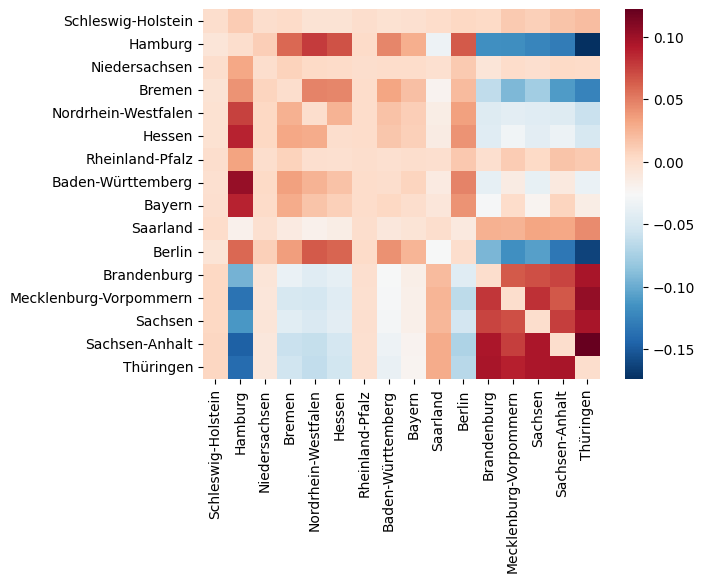

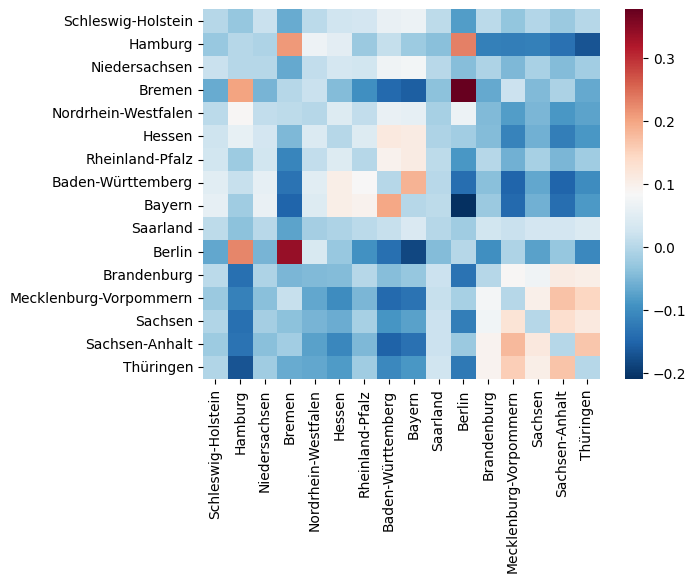

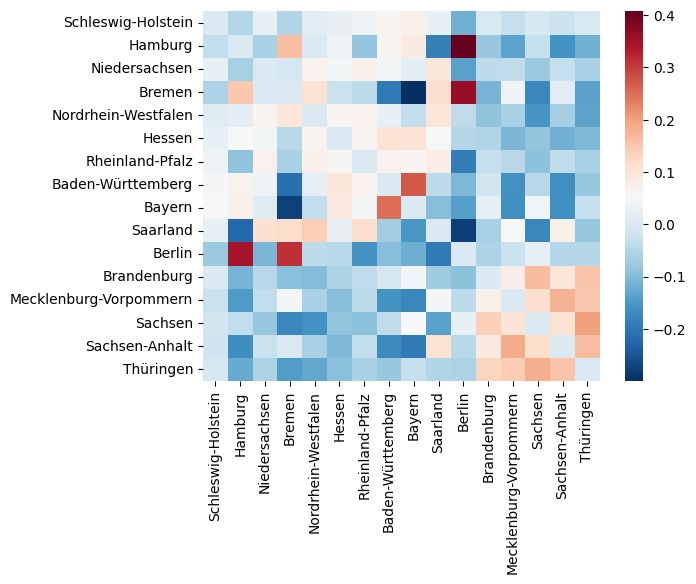

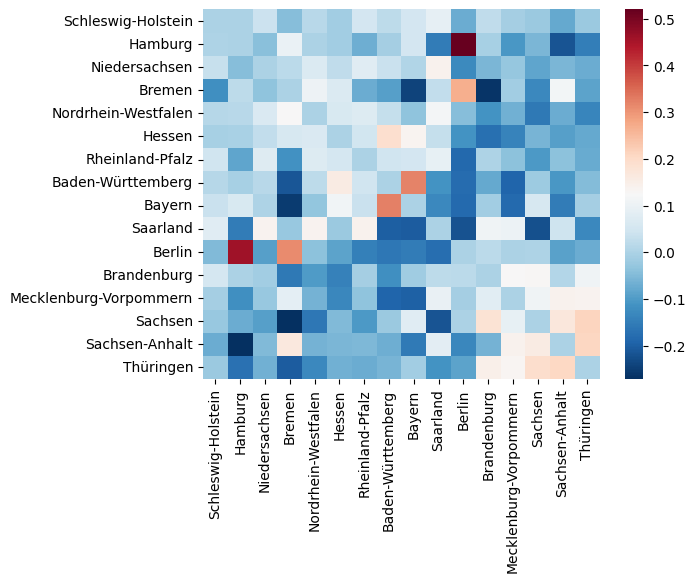

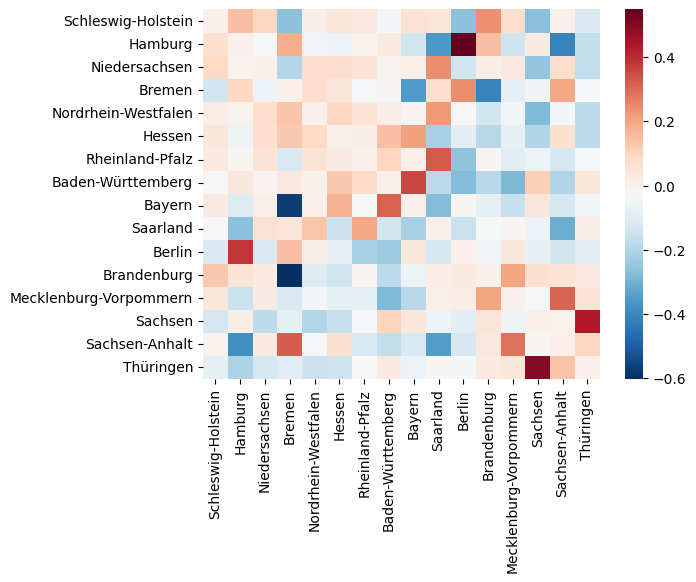

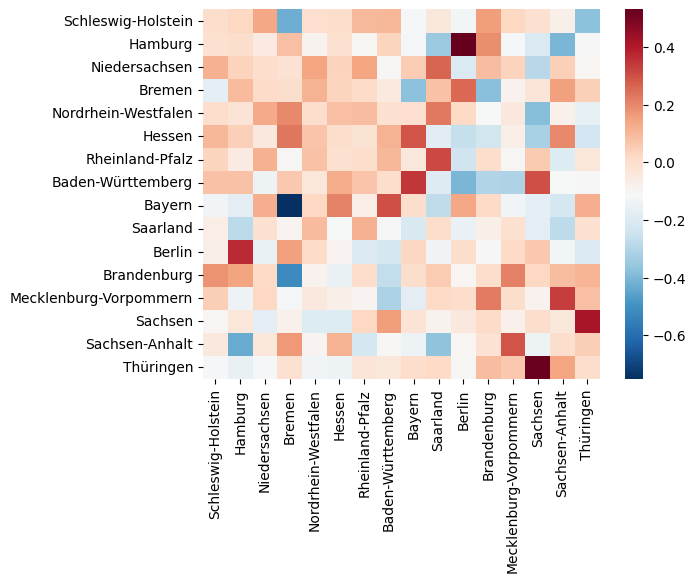

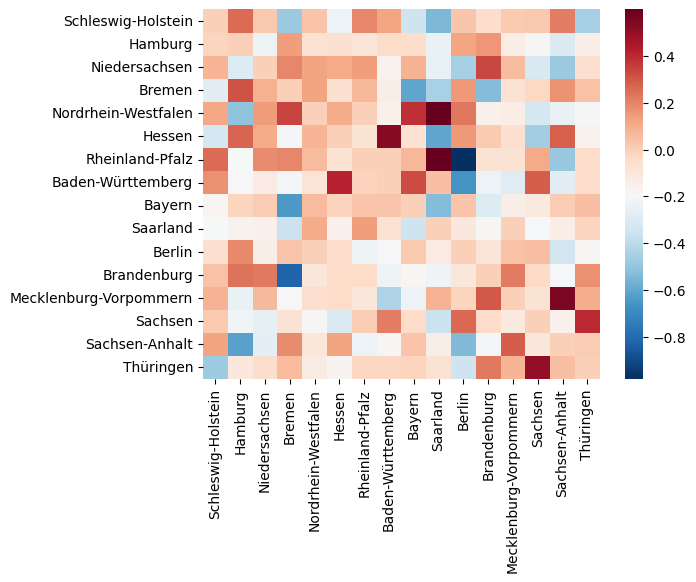

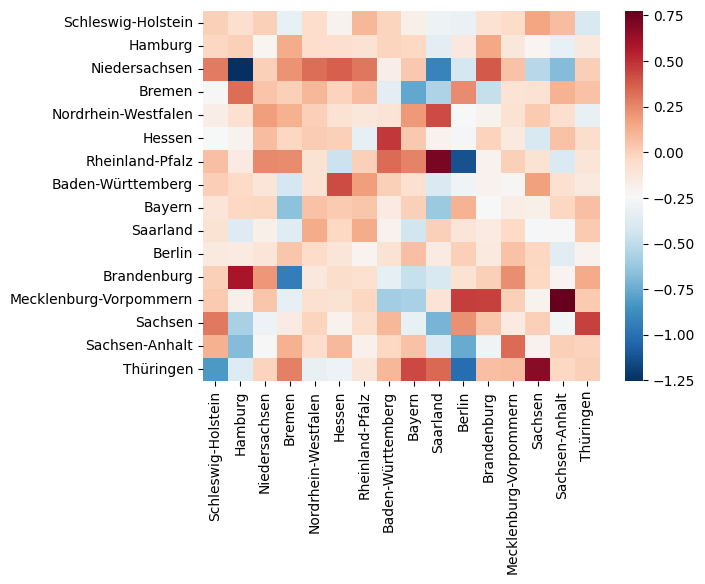

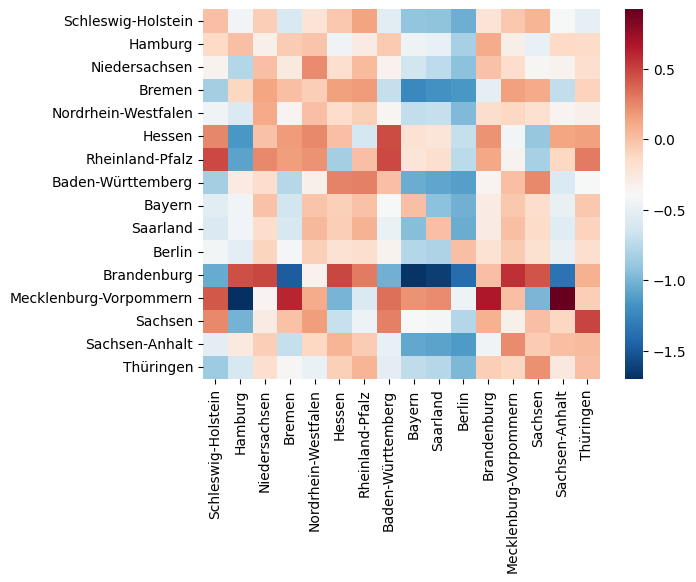

In [56]:
for k in [1, 2, 3, 4, 6, 8, 10, 12, 14]:
    coefficients = {}
    for i, column in enumerate(df.columns):
        X = df.drop(columns=column)
        y = df[column]
        regressor = LinearRegression(fit_intercept=False)
        coefficients[column] = np.insert(pc_regression(X, y, regressor, k), i, 0)
    coefficients_df = pd.DataFrame(coefficients, index=df.columns)
    sns.heatmap(coefficients_df, cmap="RdBu_r")
    plt.show()

Schleswig-Holstein


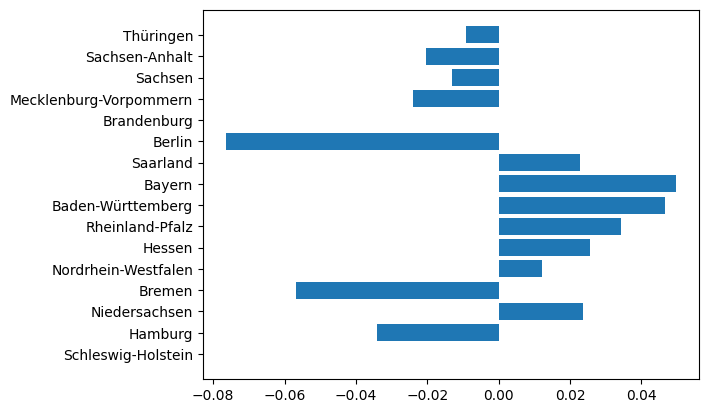

Hamburg


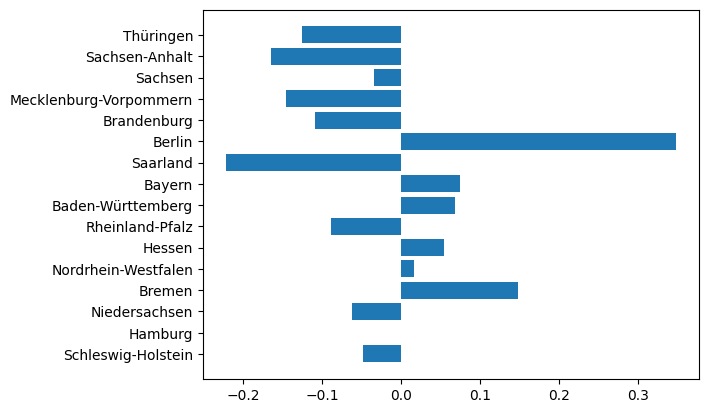

Niedersachsen


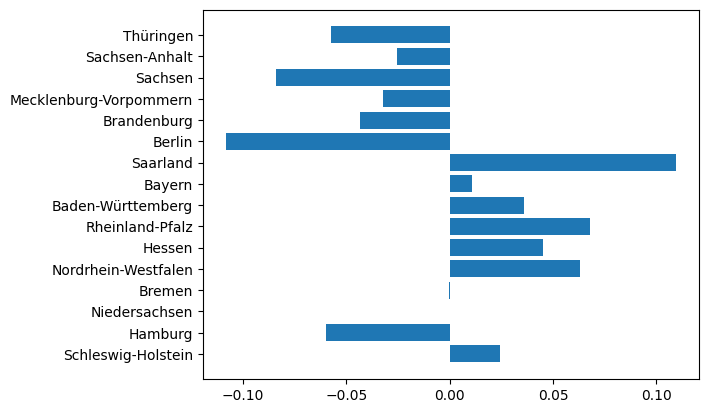

Bremen


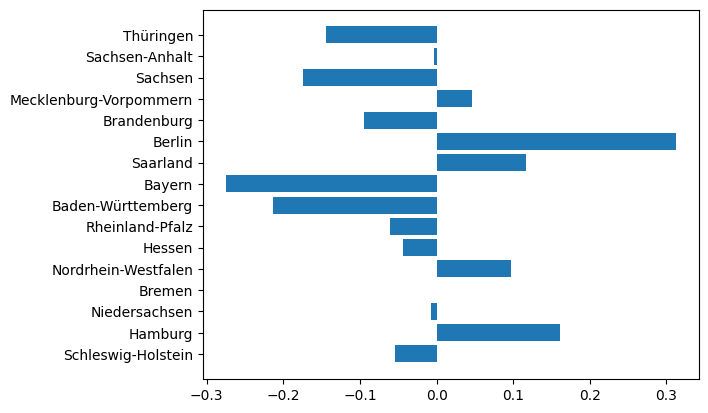

Nordrhein-Westfalen


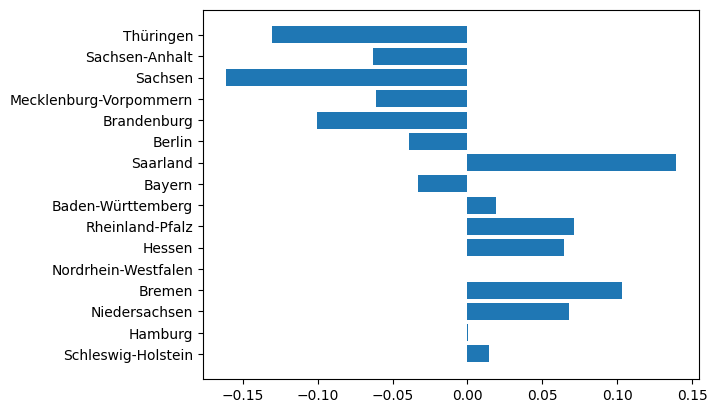

Hessen


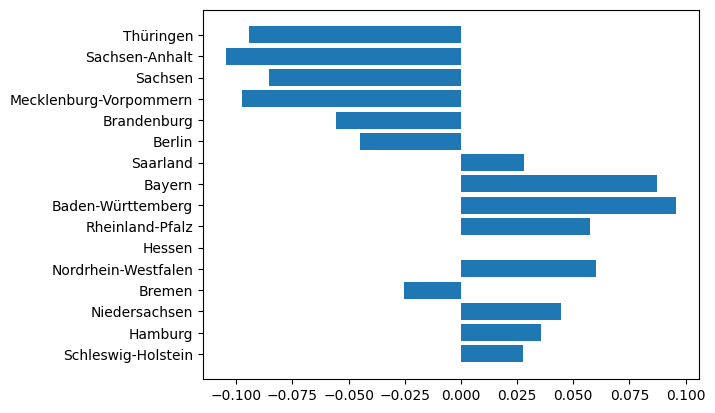

Rheinland-Pfalz


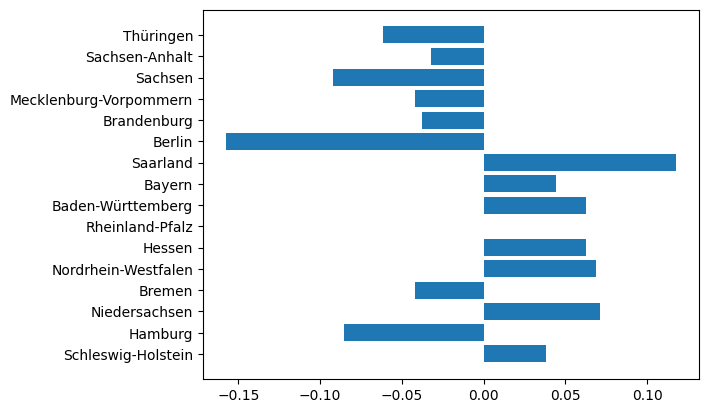

Baden-Württemberg


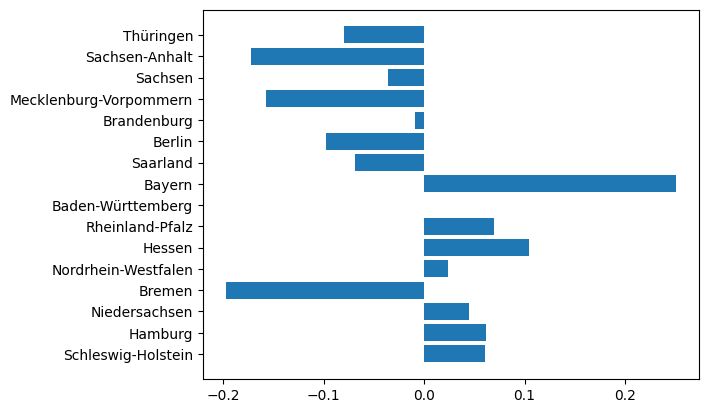

Bayern


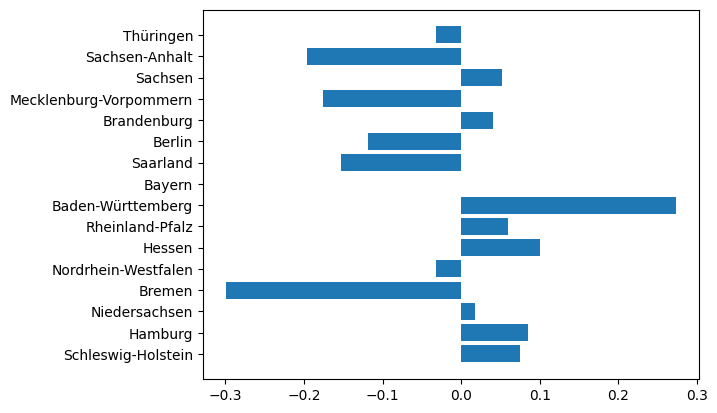

Saarland


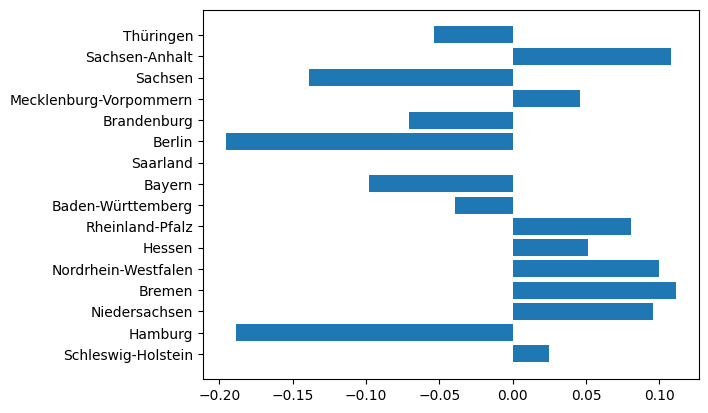

Berlin


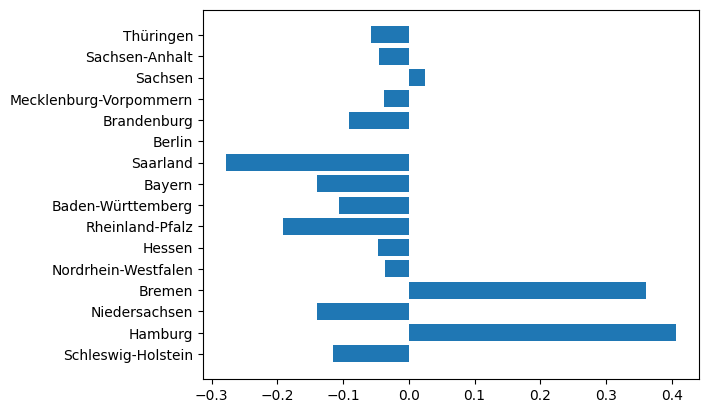

Brandenburg


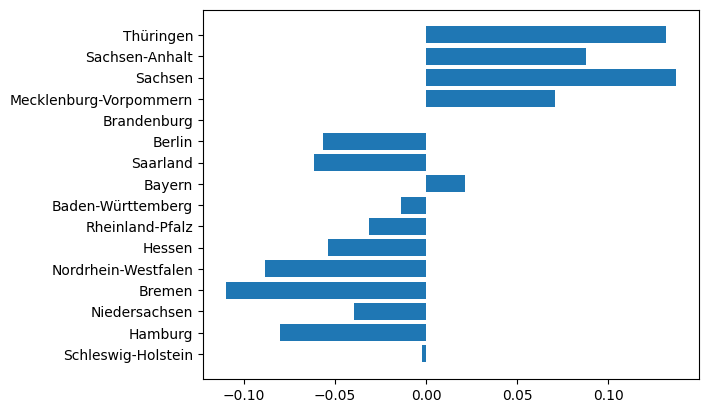

Mecklenburg-Vorpommern


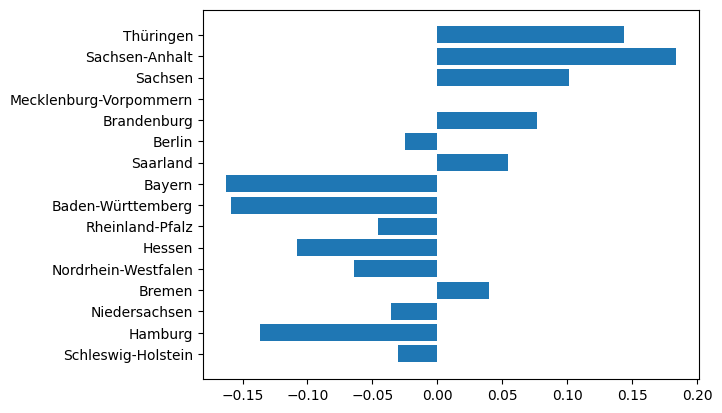

Sachsen


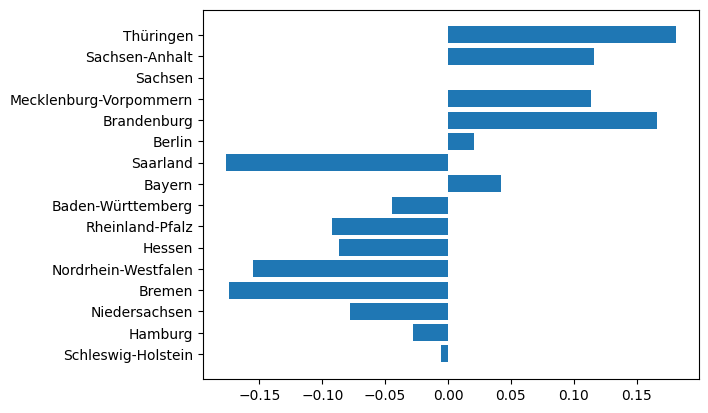

Sachsen-Anhalt


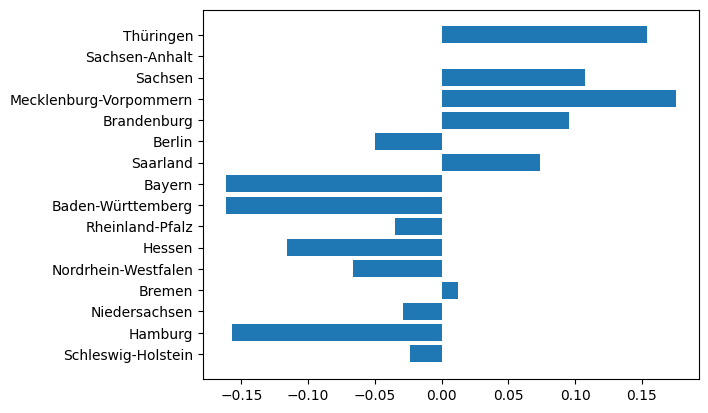

Thüringen


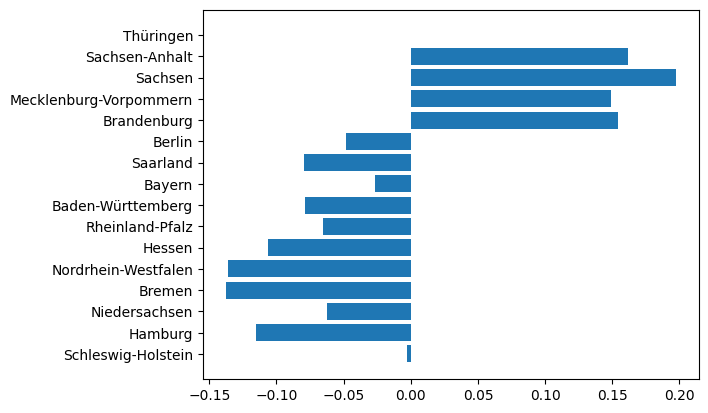

In [69]:
coefficients = {}
for i, column in enumerate(df.columns):
    X = df.drop(columns=column)
    y = df[column]
    regressor = LinearRegression(fit_intercept=False)
    coefficients[column] = np.insert(pc_regression(X, y, regressor, 3), i, 0)
for column in df.columns:
    print(column)
    plt.barh(df.columns, coefficients[column])
    plt.show()

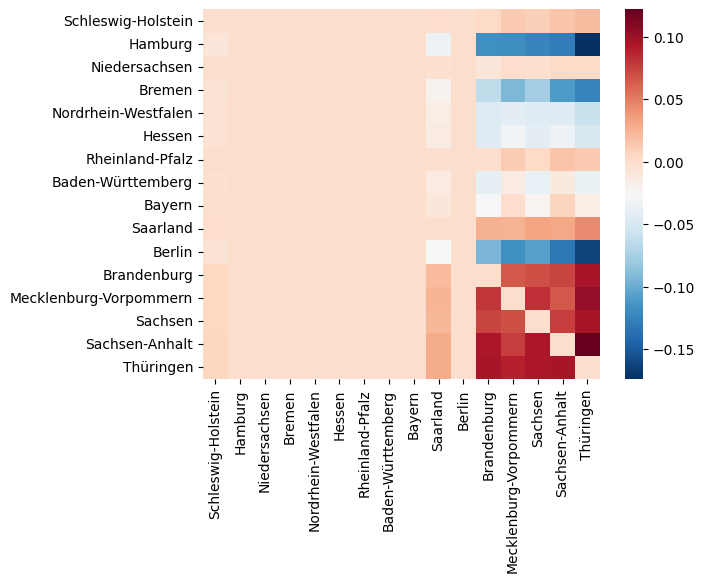

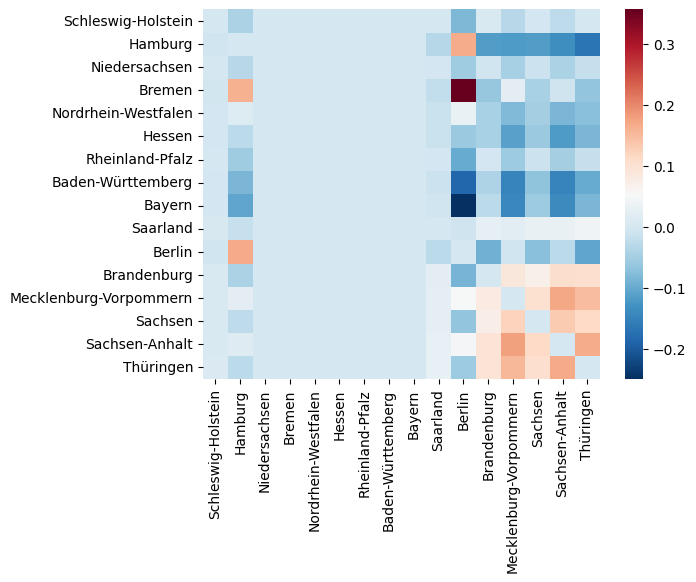

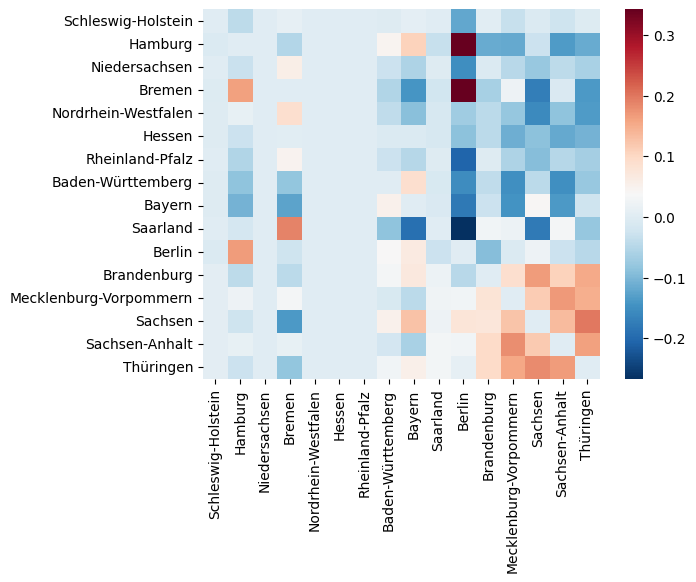

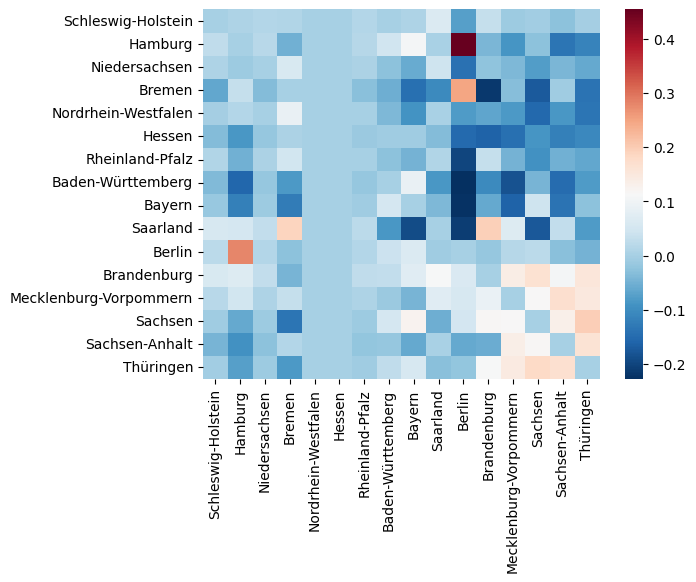

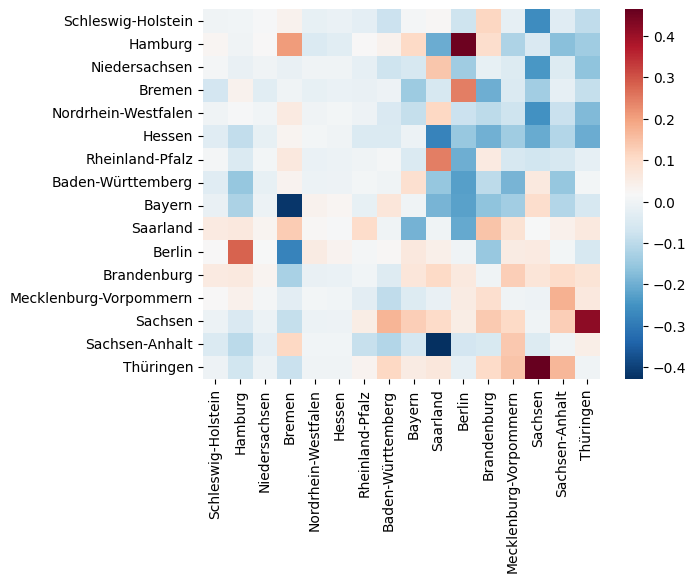

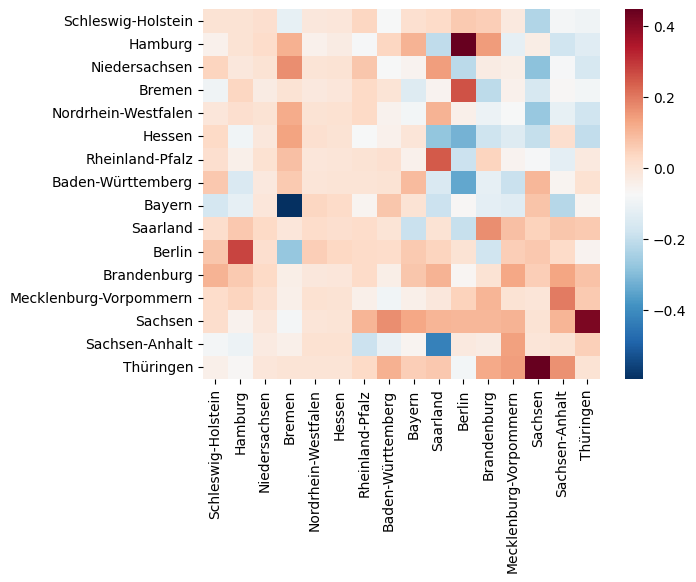

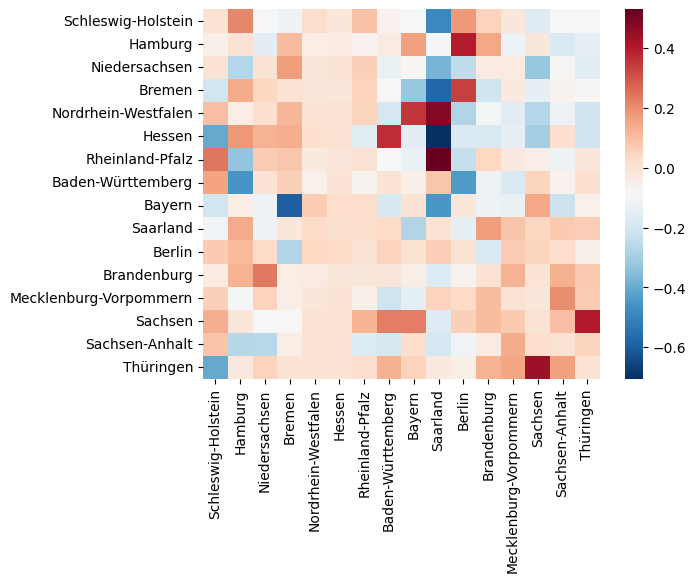

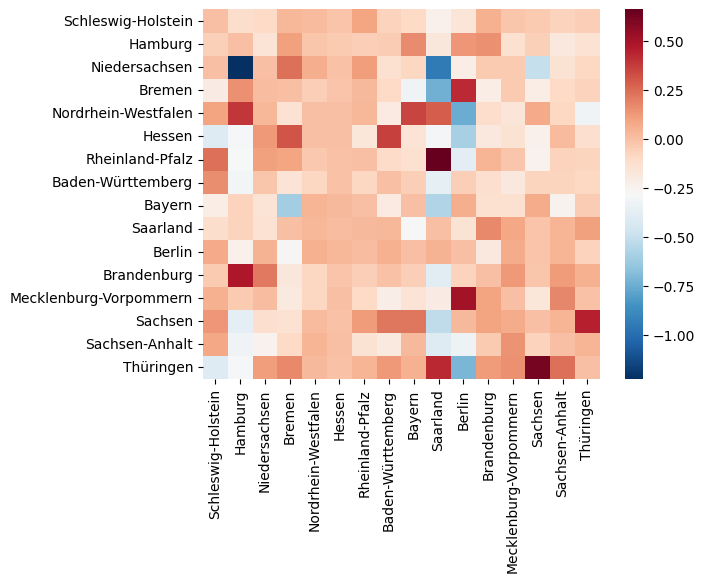

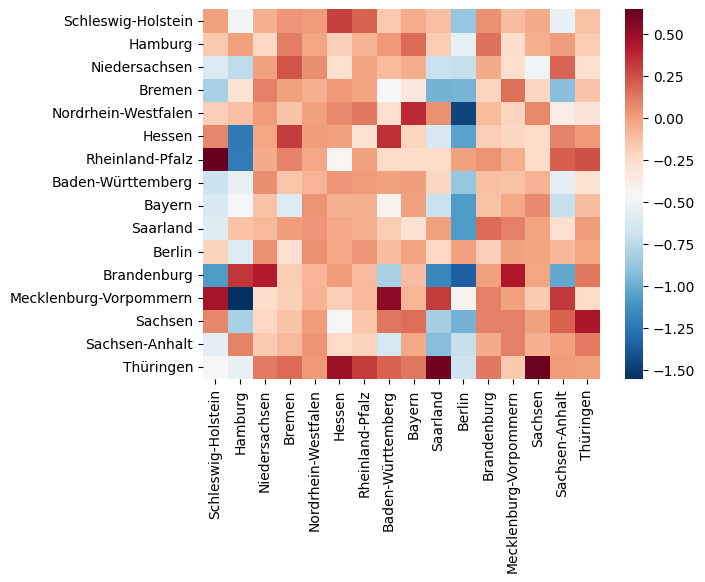

In [57]:
for k in [1, 2, 3, 4, 6, 8, 10, 12, 14]:
    coefficients = {}
    for i, column in enumerate(df.columns):
        X = df.drop(columns=column)
        y = df[column]
        regressor = LinearRegression(fit_intercept=False, positive=True)
        coefficients[column] = np.insert(pc_regression(X, y, regressor, k), i, 0)
    coefficients_df = pd.DataFrame(coefficients, index=df.columns)
    sns.heatmap(coefficients_df, cmap="RdBu_r")
    plt.show()

<Axes: >

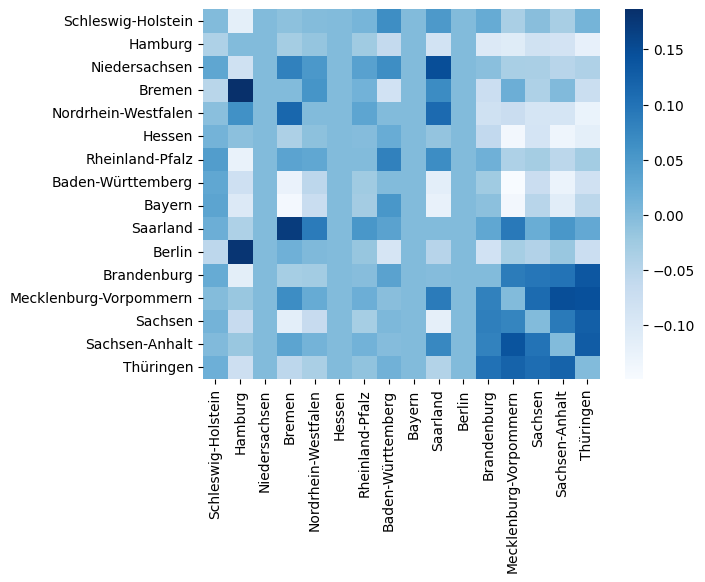

In [79]:
from sklearn.linear_model import Lasso

coefficients = {}
for i, column in enumerate(df.columns):
    X = df.drop(columns=column)
    y = df[column]
    regressor = Lasso(positive=True, alpha=0.1)
    coefficients[column] = np.insert(pc_regression(X, y, regressor), i, 0)
coefficients_df = pd.DataFrame(coefficients, index=df.columns)
sns.heatmap(coefficients_df, cmap="Blues")

In [87]:
# define an sklearn model for nonnegative least squares regression

from scipy.optimize import nnls
from sklearn.base import BaseEstimator, RegressorMixin


class NNLSRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.coef_, _ = nnls(X, y, maxiter=1_000_000)
        return self

    def predict(self, X):
        return np.dot(X, self.coef_)

<Axes: >

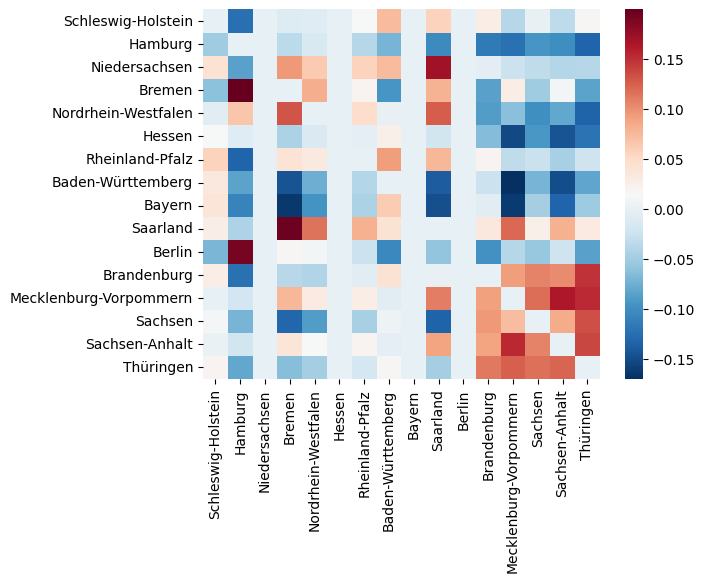

In [88]:
coefficients = {}
for i, column in enumerate(df.columns):
    X = df.drop(columns=column)
    y = df[column]
    regressor = NNLSRegressor()
    coefficients[column] = np.insert(pc_regression(X, y, regressor), i, 0)
coefficients_df = pd.DataFrame(coefficients, index=df.columns)
# use a colormap where negative values are distinct
sns.heatmap(coefficients_df, cmap="RdBu_r")

#### Without standardization

The problem is that after standardization, the data is partly negative. Trying other normalization methods.

<Axes: >

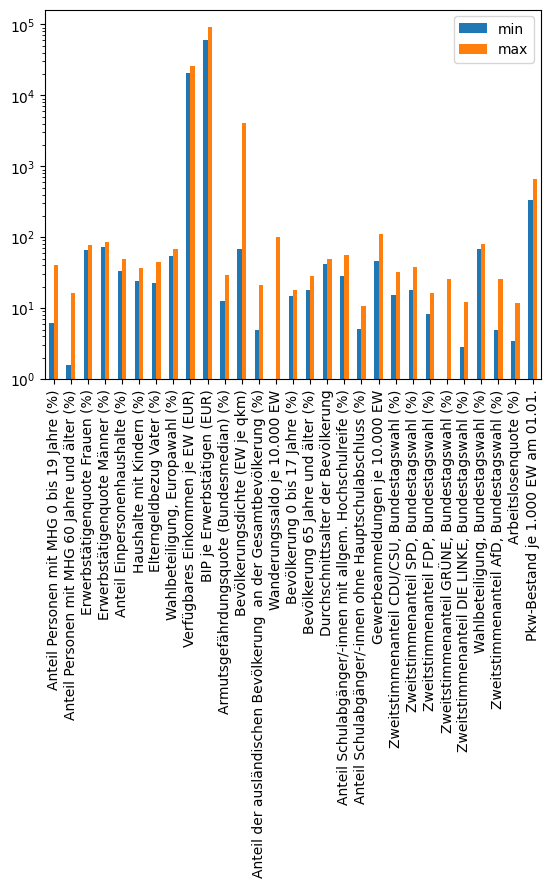

In [9]:
# make all values numeric


# visualize the ranges of values in each column of df_original
df_original.describe().loc[["min", "max"]].T.plot.bar(log=True)

In [10]:
df_original.describe()

Anteil Personen mit MHG 0 bis 19 Jahre (%)  \
count                                   16.000000   
mean                                    22.931250   
std                                     12.698647   
min                                      6.100000   
25%                                      7.975000   
50%                                     24.200000   
75%                                     33.375000   
max                                     39.800000   

       Anteil Personen mit MHG 60 Jahre und älter (%)  \
count                                       16.000000   
mean                                         8.287500   
std                                          5.010905   
min                                          1.600000   
25%                                          2.325000   
50%                                          8.850000   
75%                                         13.000000   
max                                         15.300000   

       Erwerbstätigenquote Frauen (%)  Erwerbstätigenquote Männer (%)  \
count                       16.000000                       16.000000   
mean                        71.468750                       78.618750   
std                          2.784653                        2.911407   
min                         66.800000                       72.400000   
25%                         69.700000                       77.525000   
50%                         71.650000                       79.250000   
75%                         73.675000                       80.000000   
max                         75.600000                       83.600000   

       Anteil Einpersonenhaushalte (%)  Haushalte mit Kindern (%)  \
count                        16.000000                  16.000000   
mean                         38.062500                  31.362500   
std                           4.680153                   3.799803   
min                          33.200000                  24.100000   
25%                          35.125000                  29.400000   
50%                          36.150000                  31.950000   
75%                          38.125000                  34.325000   
max                          49.100000                  36.100000   

       Elterngeldbezug Vater (%)  Wahlbeteiligung, Europawahl (%)  \
count                   16.00000                        16.000000   
mean                    33.16250                        61.262500   
std                      6.34664                         2.841097   
min                     23.00000                        54.700000   
25%                     27.85000                        59.650000   
50%                     32.20000                        61.450000   
75%                     37.77500                        63.150000   
max                     44.20000                        66.400000   

       Verfügbares Einkommen je EW (EUR)  BIP je Erwerbstätigen (EUR)  \
count                          16.000000                    16.000000   
mean                        22979.187500                 71880.250000   
std                          1671.407918                  8582.460995   
min                         20945.000000                 60802.000000   
25%                         21693.250000                 64656.750000   
50%                         22564.500000                 71726.000000   
75%                         24290.500000                 76074.500000   
max                         25930.000000                 91289.000000   

       Armutsgefährdungsquote (Bundesmedian) (%)  \
count                                  16.000000   
mean                                   17.950000   
std                                     3.399804   
min                                    12.800000   
25%                                    16.650000   
50%                                    17.950000   
75%                                    19.050000   
max                                    

In [11]:
col = "Wanderungssaldo je 10.000 EW"
df = df_original.copy()
df = df.drop(columns=col)

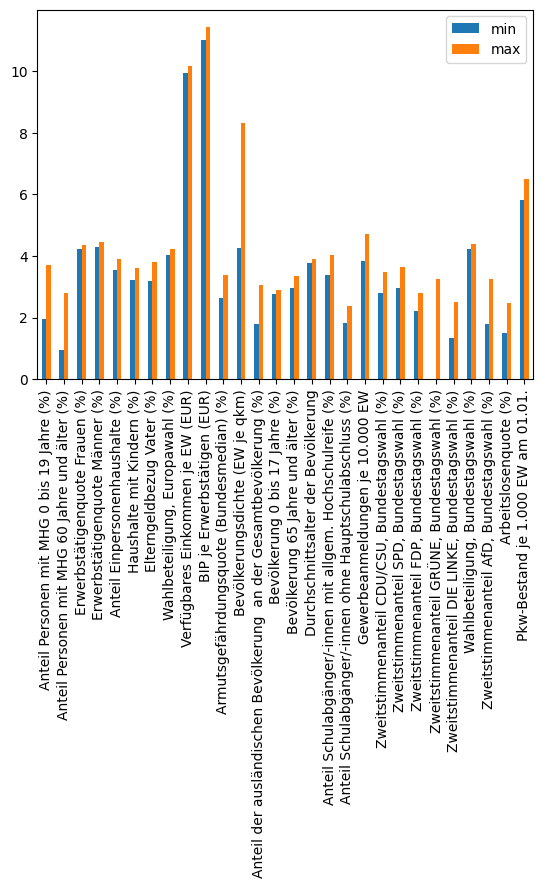

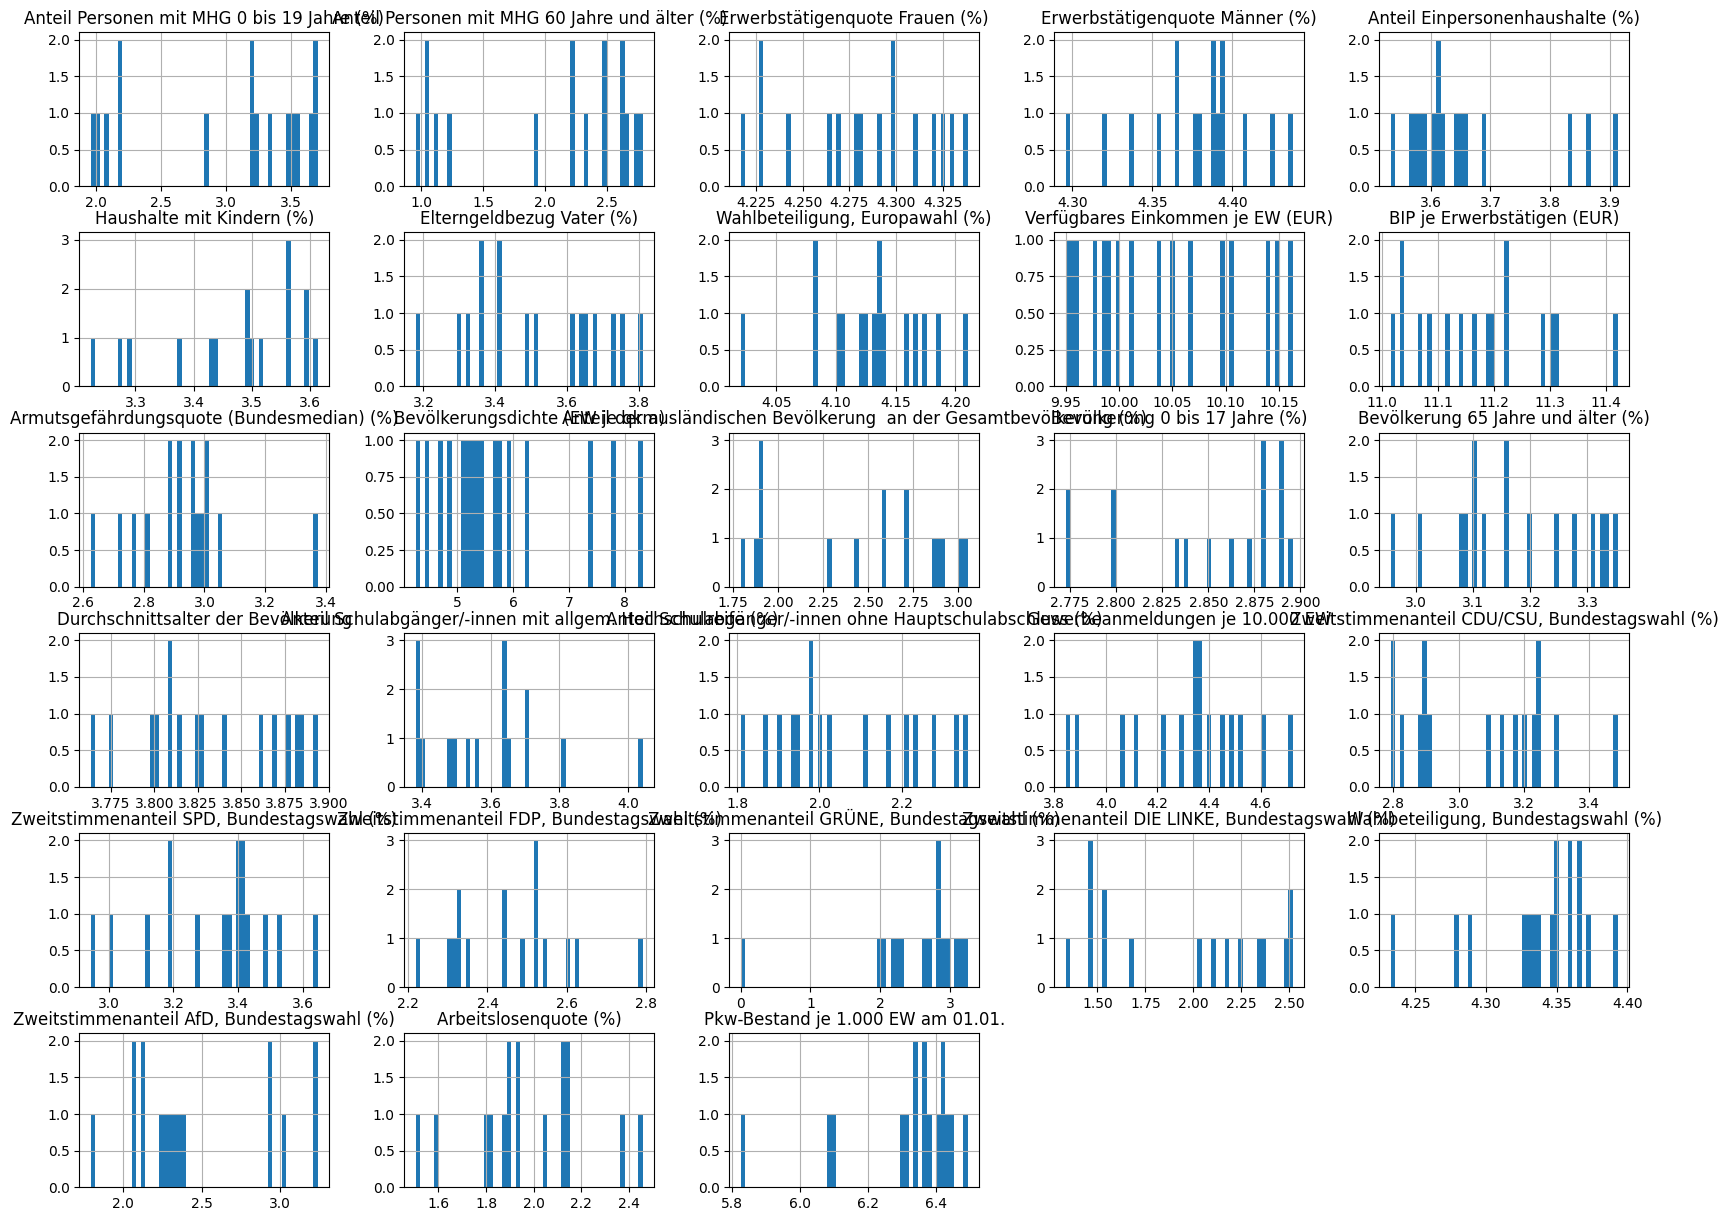

In [12]:
# apply log scaling
df = df.apply(lambda x: np.log(x + 1))

df.describe().loc[["min", "max"]].T.plot.bar()

# plot the distribution of values in each column of df
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [13]:
df = df.T
df

Schleswig-Holstein  \
Anteil Personen mit MHG 0 bis 19 Jahre (%)                    2.856470   
Anteil Personen mit MHG 60 Jahre und älter (%)                1.931521   
Erwerbstätigenquote Frauen (%)                                4.279440   
Erwerbstätigenquote Männer (%)                                4.391977   
Anteil Einpersonenhaushalte (%)                               3.613617   
Haushalte mit Kindern (%)                                     3.490429   
Elterngeldbezug Vater (%)                                     3.414443   
Wahlbeteiligung, Europawahl (%)                               4.105944   
Verfügbares Einkommen je EW (EUR)                            10.095636   
BIP je Erwerbstätigen (EUR)                                  11.142688   
Armutsgefährdungsquote (Bundesmedian) (%)                     2.809403   
Bevölkerungsdichte (EW je qkm)                                5.225209   
Anteil der ausländischen Bevölkerung  an der Ge...            2.292535   
Bevölkerung 0 bis 17 Jahre (%)                                2.850707   
Bevölkerung 65 Jahre und älter (%)                            3.198673   
Durchschnittsalter der Bevölkerung                            3.841601   
Anteil Schulabgänger/-innen mit allgem. Hochsch...            3.640214   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...            2.163323   
Gewerbeanmeldungen je 10.000 EW                               4.453184   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)                3.135494   
Zweitstimmenanteil SPD, Bundestagswahl (%)                    3.367296   
Zweitstimmenanteil FDP, Bundestagswahl (%)                    2.602690   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)                  2.960105   
Zweitstimmenanteil DIE LINKE, Bundestagswahl (%)              1.526056   
Wahlbeteiligung, Bundestagswahl (%)                           4.371976   
Zweitstimmenanteil AfD, Bundestagswahl (%)                    2.054124   
Arbeitslosenquote (%)                                         1.887070   
Pkw-Bestand je 1.000 EW am 01.01.                             6.386037   

                                                      Hamburg  Niedersachsen  \
Anteil Personen mit MHG 0 bis 19 Jahre (%)           3.708682       3.194583   
Anteil Personen mit MHG 60 Jahre und älter (%)       2.727853       2.230014   
Erwerbstätigenquote Frauen (%)                       4.297285       4.264087   
Erwerbstätigenquote Männer (%)                       4.375757       4.389499   
Anteil Einpersonenhaushalte (%)                      3.862833       3.577948   
Haushalte mit Kindern (%)                            3.277145       3.566712   
Elterngeldbezug Vater (%)                            3.645450       3.493473   
Wahlbeteiligung, Europawahl (%)                      4.141546       4.135167   
Verfügbares Einkommen je EW (EUR)                   10.138006      10.037931   
BIP je Erwerbstätigen (EUR)                         11.421797      11.201046   
Armutsgefährdungsquote (Bundesmedian) (%)            2.917771       2.960105   
Bevölkerungsdichte (EW je qkm)                       7.806411       5.131081   
Anteil der ausländischen Bevölkerung  an der Ge...   2.906901       2.424803   
Bevölkerung 0 bis 17 Jahre (%)                       2.890372       2.879198   
Bevölkerung 65 Jahre und älter (%)                   2.954910       3.157000   
Durchschnittsalter der Bevölkerung                   3.763523       3.824284   
Anteil Schulabgänger/-innen mit allgem. Hochsch...   4.043051       3.538057   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...   1.931521       1.945910   
Gewerbeanmeldungen je 10.000 EW                      4.619073       4.341205   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)       2.797281       3.226844   
Zweitstimmenanteil SPD, Bundestagswahl (%)           3.424263       3.529297   
Zweitstimmenanteil FDP, Bundestagswahl (%)           2.517696       2.442347   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)         3.254243    

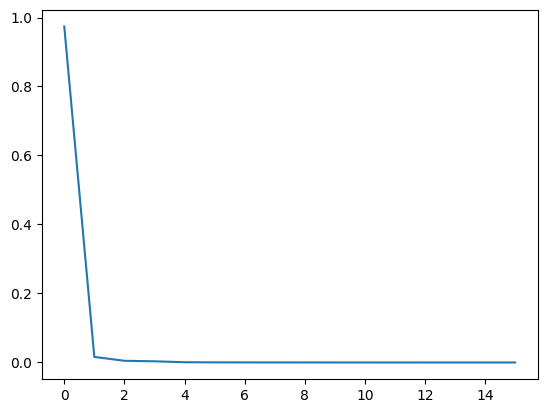

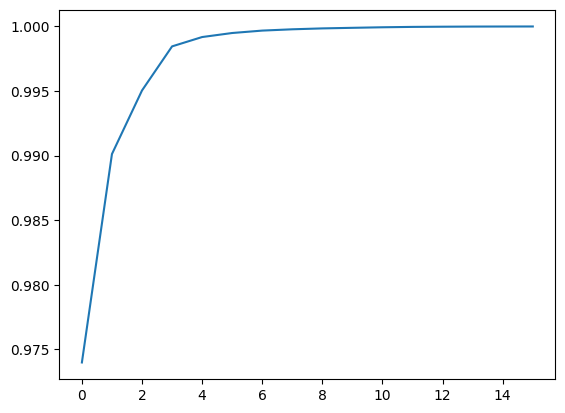

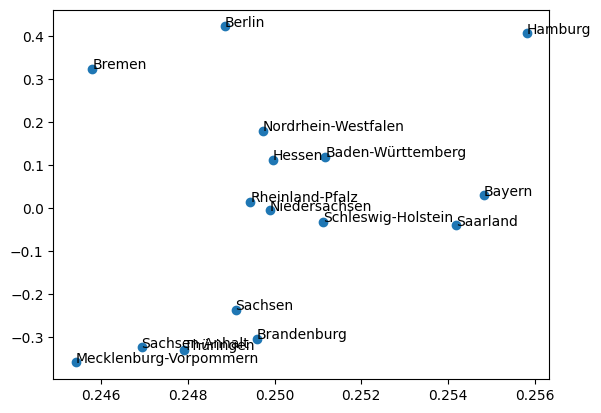

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA().fit(df)
# visualize the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.show()
# visualize the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
# visualize the regions and their coordinates in the first two principal components
plt.scatter(pca.components_[0], pca.components_[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (pca.components_[0][i], pca.components_[1][i]))
plt.show()

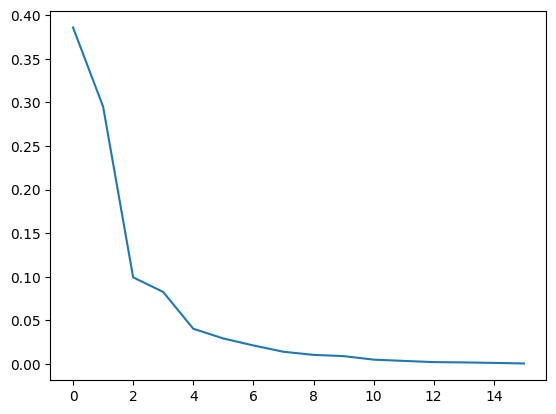

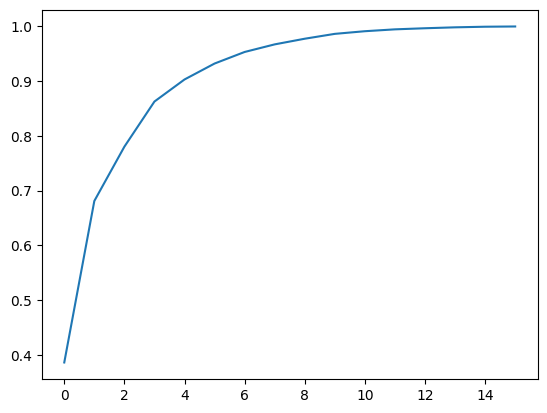

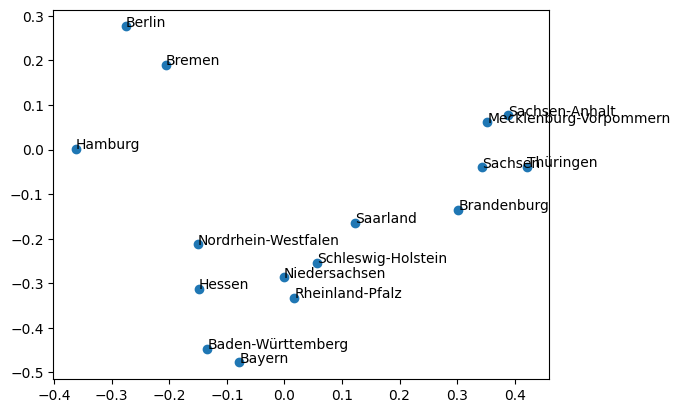

In [16]:
df = df_original.copy()
# apply min-max scaling
df = (df - df.min()) / (df.max() - df.min())
df = df.T

pca = PCA().fit(df)
# visualize the explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.show()
# visualize the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()
# visualize the regions and their coordinates in the first two principal components
plt.scatter(pca.components_[0], pca.components_[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (pca.components_[0][i], pca.components_[1][i]))
plt.show()

In [27]:
pd.DataFrame(pca.transform(df), index=df.index)

0         1   \
Anteil Personen mit MHG 0 bis 19 Jahre (%)         -1.189151 -0.080427   
Anteil Personen mit MHG 60 Jahre und älter (%)     -1.118121 -0.337160   
Erwerbstätigenquote Frauen (%)                      0.828868 -0.323083   
Erwerbstätigenquote Männer (%)                      0.319840 -0.916640   
Anteil Einpersonenhaushalte (%)                    -0.512544  1.095900   
Haushalte mit Kindern (%)                           0.522893 -1.172616   
Elterngeldbezug Vater (%)                           0.232073 -0.108861   
Wahlbeteiligung, Europawahl (%)                     0.002897 -0.342185   
Verfügbares Einkommen je EW (EUR)                  -0.674563 -0.611733   
BIP je Erwerbstätigen (EUR)                        -0.821942 -0.000084   
Armutsgefährdungsquote (Bundesmedian) (%)          -0.045050  0.822953   
Bevölkerungsdichte (EW je qkm)                     -0.679277  1.250731   
Anteil der ausländischen Bevölkerung  an der Ge... -1.084258  0.074475   
Wanderungssaldo je 10.000 EW                        0.812880 -0.288396   
Bevölkerung 0 bis 17 Jahre (%)                     -0.836018 -0.635247   
Bevölkerung 65 Jahre und älter (%)                  1.390558  0.089323   
Durchschnittsalter der Bevölkerung                  1.405758  0.014288   
Anteil Schulabgänger/-innen mit allgem. Hochsch... -0.411157  0.800662   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...  0.838312  0.735210   
Gewerbeanmeldungen je 10.000 EW                    -0.743959 -0.011041   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)     -0.113692 -0.470895   
Zweitstimmenanteil SPD, Bundestagswahl (%)          0.096792  0.126997   
Zweitstimmenanteil FDP, Bundestagswahl (%)         -0.264066 -0.326811   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)       -0.622080 -0.055895   
Zweitstimmenanteil DIE LINKE, Bundestagswahl (%)    0.879356  1.124079   
Wahlbeteiligung, Bundestagswahl (%)                -0.107143 -0.846507   
Zweitstimmenanteil AfD, Bundestagswahl (%)          1.244371  0.560192   
Arbeitslosenquote (%)                              -0.062126  0.953150   
Pkw-Bestand je 1.000 EW am 01.01.                   0.710547 -1.120379   

                                                          2         3   \
Anteil Personen mit MHG 0 bis 19 Jahre (%)         -0.367251 -0.234167   
Anteil Personen mit MHG 60 Jahre und älter (%)     -0.225460 -0.029470   
Erwerbstätigenquote Frauen (%)                      0.831371 -0.263627   
Erwerbstätigenquote Männer (%)                      0.272998  0.119245   
Anteil Einpersonenhaushalte (%)                     0.194782 -0.077027   
Haushalte mit Kindern (%)                          -0.297684  0.260641   
Elterngeldbezug Vater (%)                           0.961748 -0.342602   
Wahlbeteiligung, Europawahl (%)                    -0.332963 -0.239913   
Verfügbares Einkommen je EW (EUR)                   0.450797  0.432171   
BIP je Erwerbstätigen (EUR)                         0.316930  0.263404   
Armutsgefährdungsquote (Bundesmedian) (%)          -0.393527  0.183858   
Bevölkerungsdichte (EW je qkm)                      0.344891  0.464236   
Anteil der ausländischen Bevölkerung  an der Ge... -0.203590 -0.126325   
Wanderungssaldo je 10.000 EW                       -0.037145 -0.136625   
Bevölkerung 0 bis 17 Jahre (%)                      0.060830 -0.675890   
Bevölkerung 65 Jahre und älter (%)                 -0.220764  0.023807   
Durchschnittsalter der Bevölkerung                 -0.233313  0.074256   
Anteil Schulabgänger/-innen mit allgem. Hochsch...  0.106012  0.289521   
Anteil Schulabgänger/-innen ohne Hauptschulabsc... -0.196430 -0.064365   
Gewerbeanmeldungen je 10.000 EW                     0.069503 -0.142472   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)     -0.031224  0.957630   
Zweitstimmenanteil SPD, Bundestagswahl (%)         -0.894516  0.132897   
Zweitstimmenanteil FDP, Bundestagswahl (%)          0.136814  0.599671   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)        0.059015 

Now the original data do not contain negative values, but the PC transformed data does ...

<Axes: >

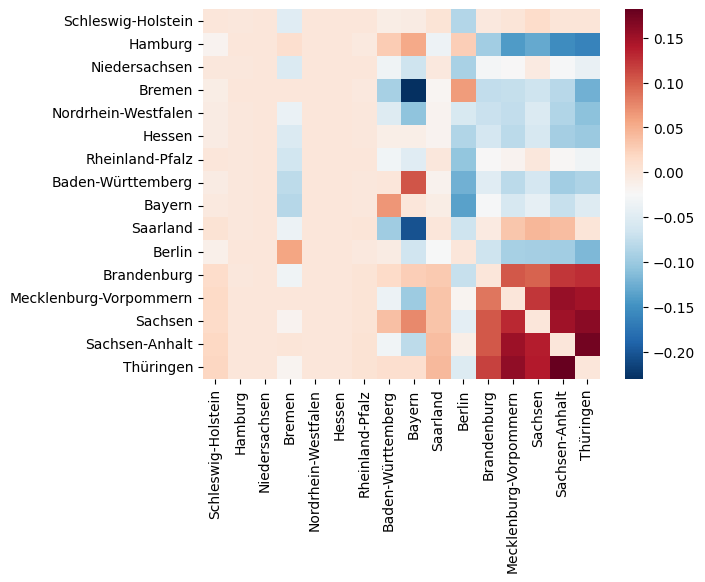

In [28]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

coefficients = {}
for i, column in enumerate(df.columns):
    X = df.drop(columns=column)
    y = df[column]
    regressor = LinearRegression(fit_intercept=False, positive=True)
    coefficients[column] = np.insert(pc_regression(X, y, regressor, 3), i, 0)
coefficients_df = pd.DataFrame(coefficients, index=df.columns)
sns.heatmap(coefficients_df, cmap="RdBu_r")

## PLS regression

/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear

<Axes: >

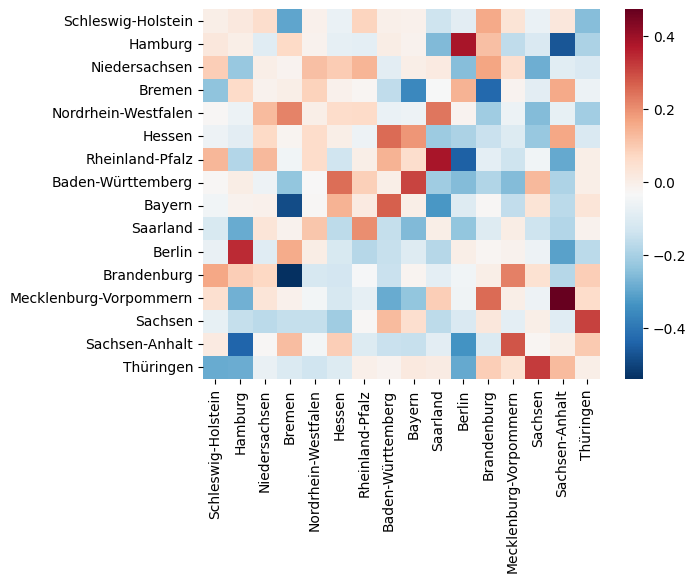

In [71]:
from sklearn.cross_decomposition import PLSRegression

coefficients = {}
for i, column in enumerate(df.columns):
    X = df.drop(columns=column)
    y = df[column]
    coef_model = PLSRegression(n_components=3).fit(X, y)
    coefficients[column] = np.insert(coef_model.coef_, i, 0)
coefficients_df = pd.DataFrame(coefficients, index=df.columns)
# use a colormap where negative values are distinct
sns.heatmap(coefficients_df, cmap="RdBu_r")

## Evaluate


In [34]:
from protest_impact.synthetic_region.hyperopt import get_study_df

study_df = get_study_df("socioeconomic_v1")
# for col in study_df.columns:
#     print(col)
# show all rows
import pandas as pd

pd.set_option("display.max_rows", None)
study_df[
    [
        # "min_control_regions",
        "method",
        # "normalize",
        # "socioeconomic_method",
        "mse_mean",
        "mse_std",
        "semi_random_post_diff_mean_week_1",
        "semi_random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
][study_df["min_control_regions"] == 5].sort_values("mse_mean").drop_duplicates(
    "mse_mean"
)

method  mse_mean   mse_std  \
41      linear_regression  0.199151  0.220727   
35                  ridge  0.207789  0.220209   
32       distance_weights  0.224454  0.244930   
33                   mean  0.232099  0.242599   
36  socioeconomic_weights  0.235213  0.250382   
30  socioeconomic_weights  0.240039  0.244175   

    semi_random_post_diff_mean_week_1  semi_random_post_diff_mean  \
41                           0.019995                    0.026899   
35                           0.022636                    0.039919   
32                           0.031353                    0.026249   
33                           0.026172                    0.021364   
36                           0.025961                    0.021555   
30                           0.025460                    0.026259   

    protest_post_diff_mean_week_1  protest_post_diff_mean  
41                      -0.006438               -0.064348  
35                       0.005390               -0.056796  
32                      -0.025974               -0.067760  
33                      -0.013340               -0.057584  
36                      -0.014051               -0.054191  
30                      -0.012654               -0.046909

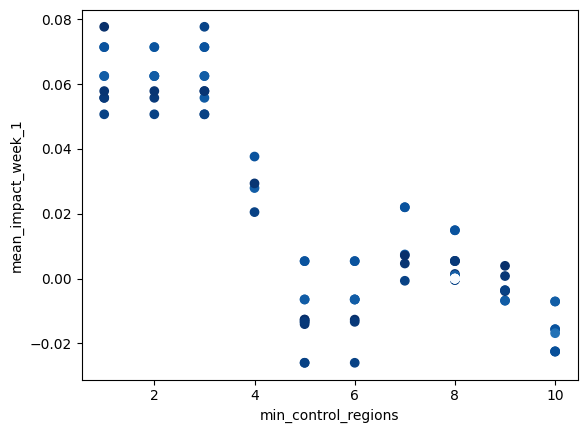

In [24]:
import matplotlib.pyplot as plt

plt.scatter(
    study_df["min_control_regions"],
    study_df["protest_post_diff_mean_week_1"],
    c=study_df["mse_mean"],
    cmap="Blues",
)
plt.xlabel("min_control_regions")
plt.ylabel("mean_impact_week_1")
plt.show()

In [25]:
study_df[
    [
        "min_control_regions",
        "method",
        "normalize",
        "socioeconomic_method",
        "mse_mean",
        "mse_std",
        "semi_random_post_diff_mean_week_1",
        "semi_random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
][study_df["min_control_regions"] == 1].sort_values("mse_mean")

min_control_regions                 method  normalize  \
37                    1      linear_regression      False   
47                    1      linear_regression      False   
31                    1                  ridge      False   
46                    1                  ridge      False   
43                    1       distance_weights      False   
39                    1                   mean      False   
40                    1                   mean      False   
42                    1  socioeconomic_weights      False   
45                    1  socioeconomic_weights      False   

   socioeconomic_method  mse_mean   mse_std  \
37           regression  0.199151  0.220727   
47           similarity  0.199151  0.220727   
31           regression  0.207789  0.220209   
46           similarity  0.207789  0.220209   
43           regression  0.224454  0.244930   
39           similarity  0.232099  0.242599   
40           regression  0.232099  0.242599   
42           similarity  0.235213  0.250382   
45           regression  0.240039  0.244175   

    semi_random_post_diff_mean_week_1  semi_random_post_diff_mean  \
37                           0.019995                    0.026899   
47                           0.019995                    0.026899   
31                           0.022636                    0.039919   
46                           0.022636                    0.039919   
43                           0.031353                    0.026249   
39                           0.026172                    0.021364   
40                           0.026172                    0.021364   
42                           0.025961                    0.021555   
45                           0.025460                    0.026259   

    protest_post_diff_mean_week_1  protest_post_diff_mean  
37                       0.062503                0.008467  
47                       0.062503                0.008467  
31                       0.071428                0.008227  
46                       0.071428                0.008227  
43                       0.050696               -0.000800  
39                       0.055773                0.005576  
40                       0.055773                0.005576  
42                       0.057856                0.009220  
45                       0.077695                0.037736

## NMF regression

In [1]:
import pandas as pd

from protest_impact.util import project_root

df = pd.read_csv(project_root / "data/regions/socioeconomic-indicators.csv")
df = df.set_index(df.columns[0], drop=True)
df = df.T
df = df.drop(columns=["Wanderungssaldo je 10.000 EW"])
df = df.T
# df = df / df.mean()
# df = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)
# df = df.T
df

Schleswig-Holstein  \
Unnamed: 0                                                               
Anteil Personen mit MHG 0 bis 19 Jahre (%)                        16.4   
Anteil Personen mit MHG 60 Jahre und älter (%)                     5.9   
Erwerbstätigenquote Frauen (%)                                    71.2   
Erwerbstätigenquote Männer (%)                                    79.8   
Anteil Einpersonenhaushalte (%)                                   36.1   
Haushalte mit Kindern (%)                                         31.8   
Elterngeldbezug Vater (%)                                         29.4   
Wahlbeteiligung, Europawahl (%)                                   59.7   
Verfügbares Einkommen je EW (EUR)                              24236.0   
BIP je Erwerbstätigen (EUR)                                    69056.0   
Armutsgefährdungsquote (Bundesmedian) (%)                         15.6   
Bevölkerungsdichte (EW je qkm)                                   184.9   
Anteil der ausländischen Bevölkerung  an der Ge...                 8.9   
Bevölkerung 0 bis 17 Jahre (%)                                    16.3   
Bevölkerung 65 Jahre und älter (%)                                23.5   
Durchschnittsalter der Bevölkerung                                45.6   
Anteil Schulabgänger/-innen mit allgem. Hochsch...                37.1   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...                 7.7   
Gewerbeanmeldungen je 10.000 EW                                   84.9   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)                    22.0   
Zweitstimmenanteil SPD, Bundestagswahl (%)                        28.0   
Zweitstimmenanteil FDP, Bundestagswahl (%)                        12.5   
Zweitstimmenanteil GRÜNE, Bundestagswahl (%)                      18.3   
Zweitstimmenanteil DIE LINKE, Bundestagswahl (%)                   3.6   
Wahlbeteiligung, Bundestagswahl (%)                               78.2   
Zweitstimmenanteil AfD, Bundestagswahl (%)                         6.8   
Arbeitslosenquote (%)                                              5.6   
Pkw-Bestand je 1.000 EW am 01.01.                                592.5   

                                                    Hamburg  Niedersachsen  \
Unnamed: 0                                                                   
Anteil Personen mit MHG 0 bis 19 Jahre (%)             39.8           23.4   
Anteil Personen mit MHG 60 Jahre und älter (%)         14.3            8.3   
Erwerbstätigenquote Frauen (%)                         72.5           70.1   
Erwerbstätigenquote Männer (%)                         78.5           79.6   
Anteil Einpersonenhaushalte (%)                        46.6           34.8   
Haushalte mit Kindern (%)                              25.5           34.4   
Elterngeldbezug Vater (%)                              37.3           31.9   
Wahlbeteiligung, Europawahl (%)                        61.9           61.5   
Verfügbares Einkommen je EW (EUR)                   25285.0        22877.0   
BIP je Erwerbstätigen (EUR)                         91289.0        73206.0   
Armutsgefährdungsquote (Bundesmedian) (%)              17.5           18.3   
Bevölkerungsdichte (EW je qkm)                       2455.3          168.2   
Anteil der ausländischen Bevölkerung  an der Ge...     17.3           10.3   
Bevölkerung 0 bis 17 Jahre (%)                         17.0           16.8   
Bevölkerung 65 Jahre und älter (%)                     18.2           22.5   
Durchschnittsalter der Bevölkerung                     42.1           44.8   
Anteil Schulabgänger/-innen mit allgem. Hochsch...     56.0           33.4   
Anteil Schulabgänger/-innen ohne Hauptschulabsc...      5.9            6.0   
Gewerbeanmeldungen je 10.000 EW                       100.4           75.8   
Zweitstimmenanteil CDU/CSU, Bundestagswahl (%)         15.4           24.2   
Zweitstimmenanteil SPD, Bundestagswahl (%)             29.7           33.1   
Zweitstimmenanteil FDP, Bundestagswah

In [79]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import NMF, PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline


def linear_coefficients(X, y, k=None):
    model = LinearRegression(fit_intercept=False, positive=True).fit(X, y)
    return model.coef_, model


def ridge_coefficients(X, y, k=3):
    model = Ridge(fit_intercept=False, positive=True, alpha=2 ** (-k)).fit(X, y)
    return model.coef_, model


def pc_coefficients(X, y, k=4):
    model = make_pipeline(
        PCA(n_components=k), LinearRegression(fit_intercept=False)
    ).fit(X, y)
    return (
        np.dot(
            model.named_steps["pca"].components_.T,
            model.named_steps["linearregression"].coef_,
        ),
        model,
    )


def pls_coefficients(X, y, k=3):
    model = PLSRegression(n_components=k).fit(X, y)
    return model.coef_, model


def nmf_coefficients(X, y, k=4):
    model = make_pipeline(
        NMF(n_components=k, max_iter=10_000),
        LinearRegression(fit_intercept=False, positive=True),
    ).fit(X, y)
    return (
        np.dot(
            model.named_steps["nmf"].components_.T,
            model.named_steps["linearregression"].coef_,
        ),
        model,
    )


coef_models = [
    linear_coefficients,
    ridge_coefficients,
    pc_coefficients,
    pls_coefficients,
    nmf_coefficients,
]

linear_coefficients


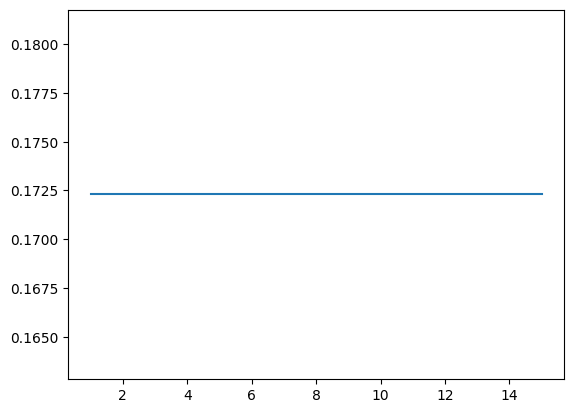

ridge_coefficients


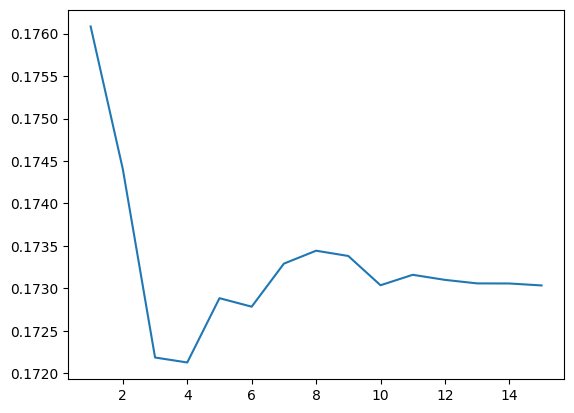

pc_coefficients


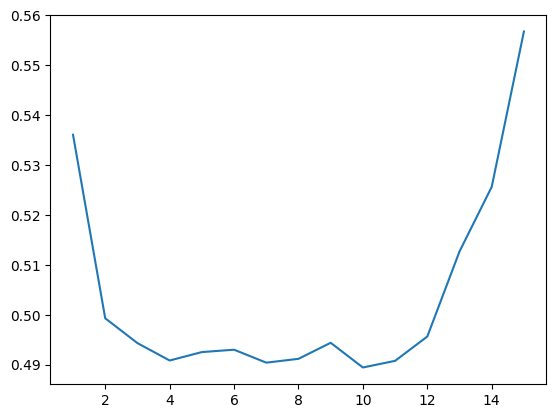

pls_coefficients


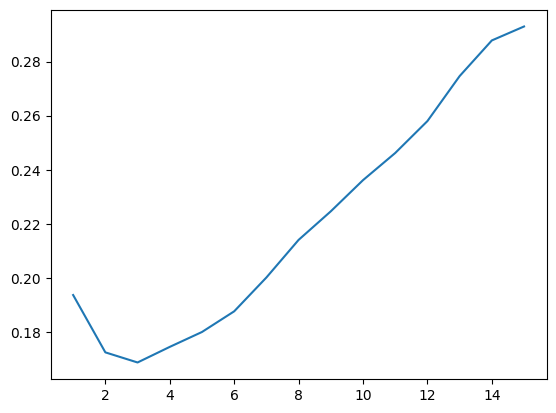

nmf_coefficients


/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 10000 reached. Increase it to improve convergence.
  warnings.warn(
/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/sklearn/

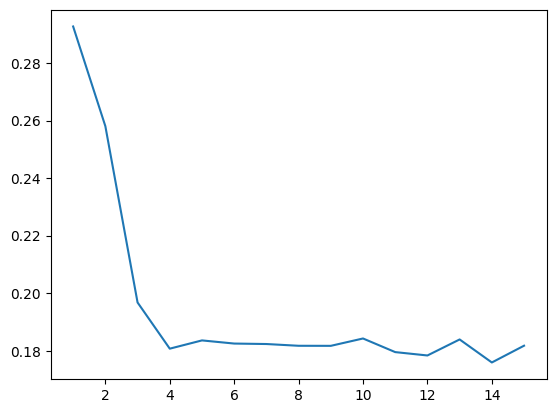

In [76]:
from collections import defaultdict

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

df_ = pd.DataFrame(
    MinMaxScaler().fit_transform(df.T).T, index=df.index, columns=df.columns
)

for coef_model in coef_models:
    print(coef_model.__name__)
    comp = defaultdict(float)
    for k in range(1, 16):
        for i, column in enumerate(df.columns):
            for train_index, test_index in KFold(n_splits=5).split(df):
                X_train = df_.iloc[train_index].drop(columns=column)
                y_train = df_.iloc[train_index][column]
                X_test = df_.iloc[test_index].drop(columns=column)
                y_test = df_.iloc[test_index][column]
                model = coef_model(X_train, y_train, k)[1]
                comp[k] += np.sqrt(
                    mean_squared_error(y_test, model.predict(X_test))
                ).mean()
        comp[k] /= len(df.columns) * 5
    plt.plot(comp.keys(), comp.values())
    plt.show()

linear_coefficients


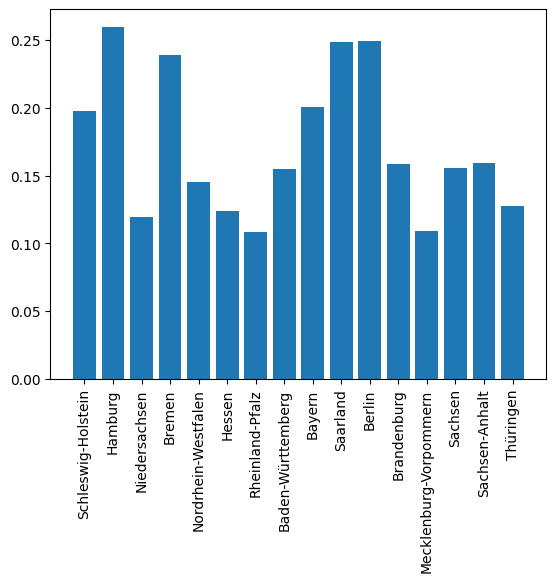

ridge_coefficients


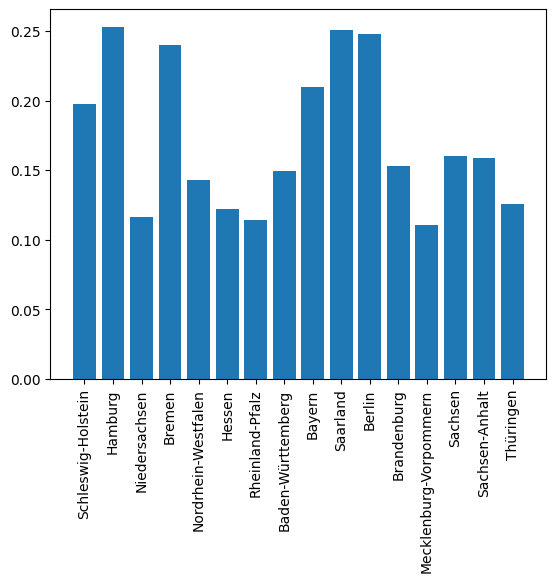

pc_coefficients


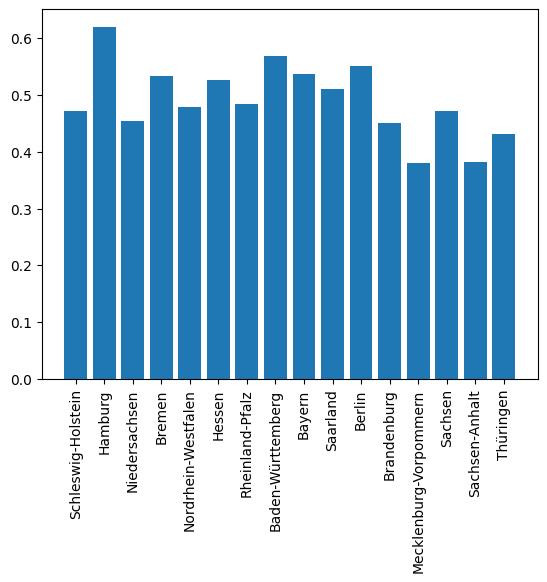

pls_coefficients


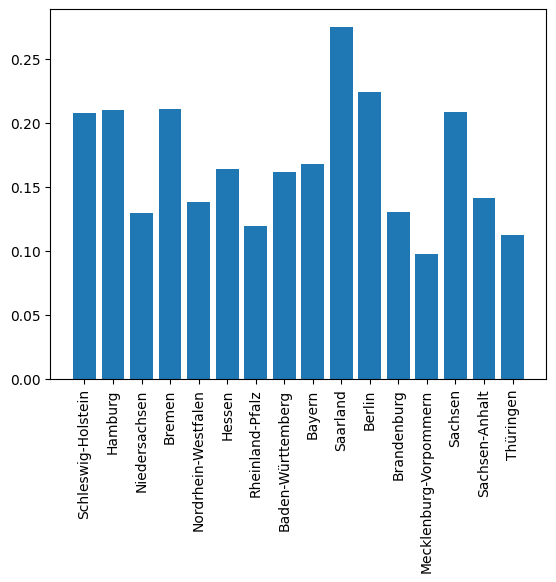

nmf_coefficients


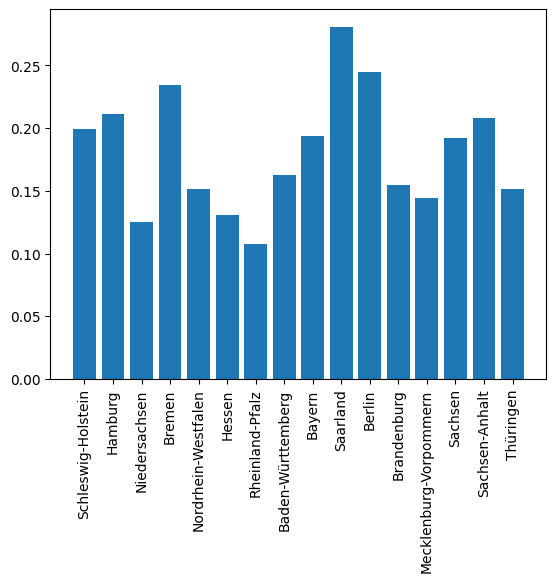

In [80]:
df_ = pd.DataFrame(
    MinMaxScaler().fit_transform(df.T).T, index=df.index, columns=df.columns
)

for coef_model in coef_models:
    print(coef_model.__name__)
    comp = defaultdict(float)
    for i, column in enumerate(df.columns):
        for train_index, test_index in KFold(n_splits=5).split(df):
            X_train = df_.iloc[train_index].drop(columns=column)
            y_train = df_.iloc[train_index][column]
            X_test = df_.iloc[test_index].drop(columns=column)
            y_test = df_.iloc[test_index][column]
            model = coef_model(X_train, y_train)[1]
            comp[column] += np.sqrt(
                mean_squared_error(y_test, model.predict(X_test))
            ).mean()
        comp[column] /= 5
    plt.bar(comp.keys(), comp.values())
    plt.xticks(rotation=90)
    plt.show()

linear_coefficients


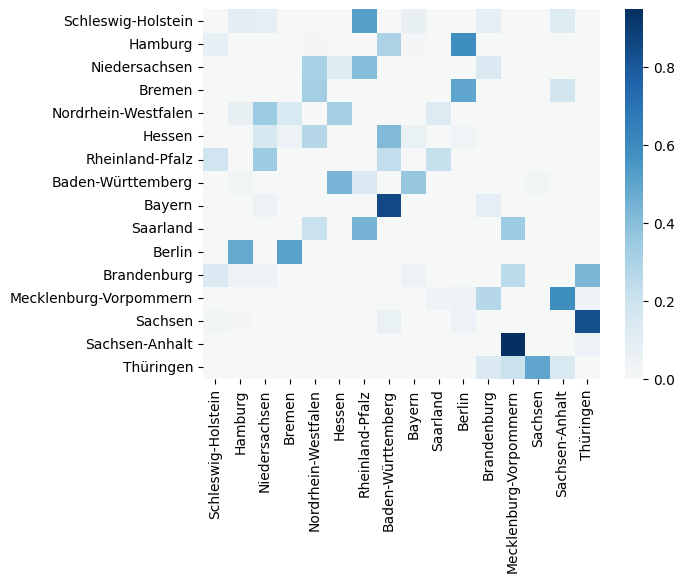

ridge_coefficients


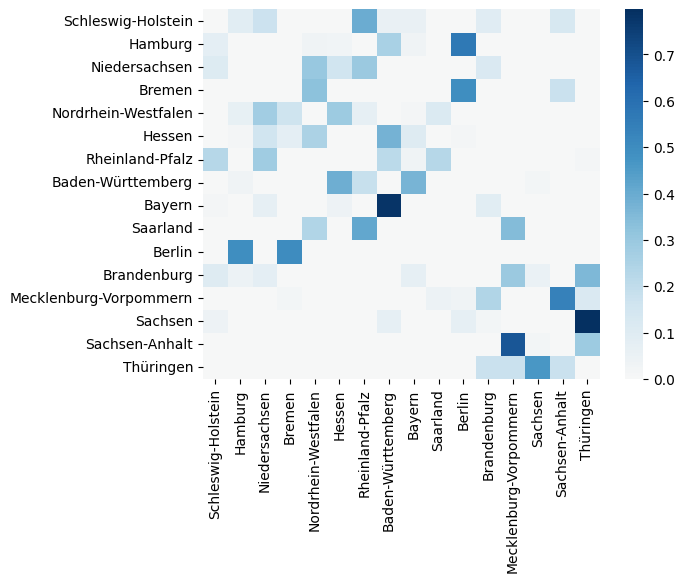

pc_coefficients


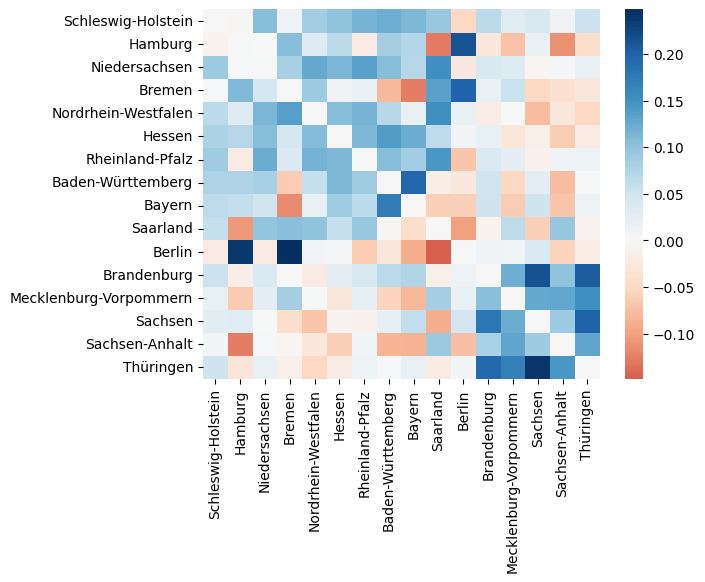

pls_coefficients


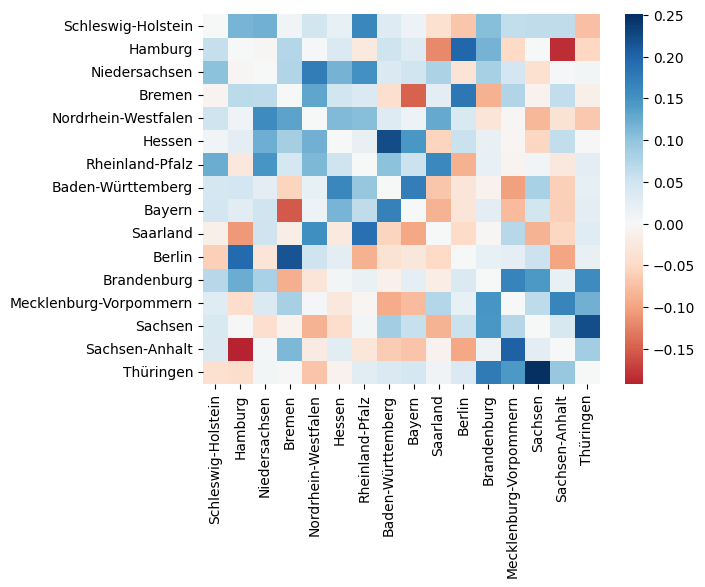

nmf_coefficients


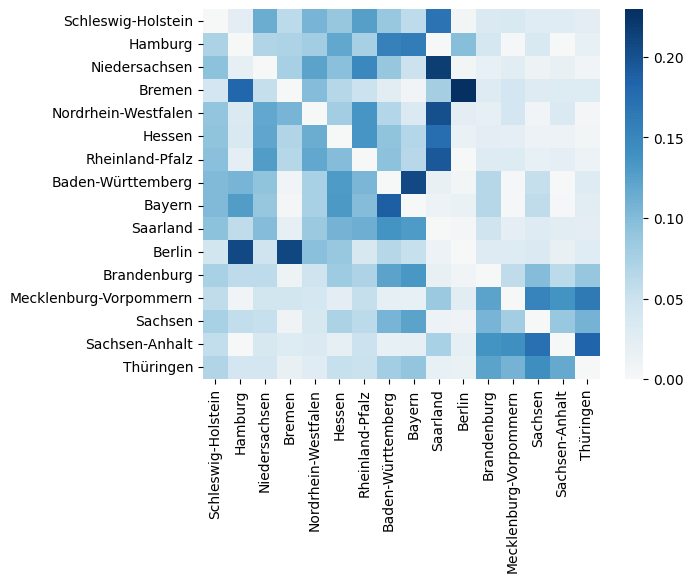

In [86]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import seaborn as sns

simplefilter(action="ignore", category=FutureWarning)

df_ = pd.DataFrame(
    MinMaxScaler().fit_transform(df.T).T, index=df.index, columns=df.columns
)

for coef_model in coef_models:
    print(coef_model.__name__)
    coefficients = {}
    for i, column in enumerate(df.columns):
        X, y = df_.drop(columns=column), df_[column]
        coef = coef_model(X, y)[0]
        coef = coef / np.sum(np.abs(coef))
        # print(np.sum(coef))
        coefficients[column] = np.insert(coef, i, 0)
    coefficients_df = pd.DataFrame(coefficients, index=df_.columns)
    sns.heatmap(coefficients_df.T, cmap="RdBu", center=0)
    plt.show()

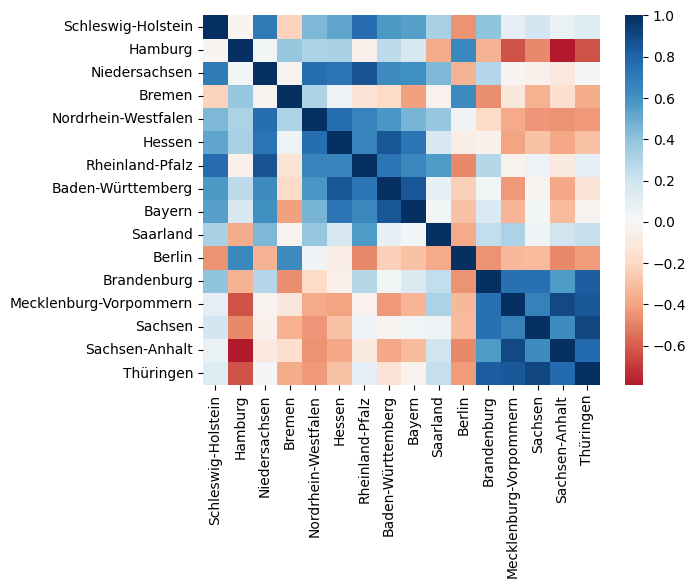

In [88]:
correlations = df_.corr()
sns.heatmap(correlations, cmap="RdBu", center=0)
plt.show()

### Maps

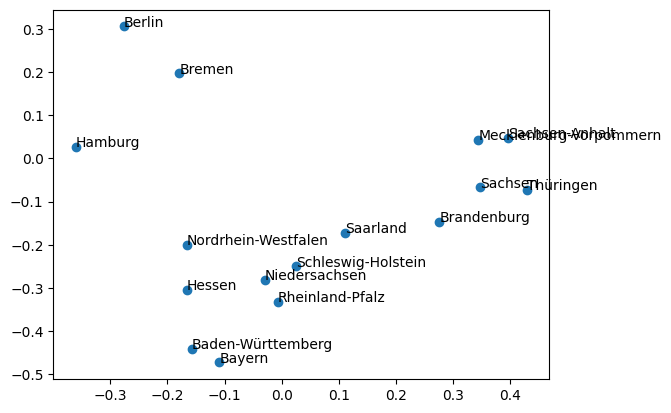

In [82]:
df_ = MinMaxScaler().fit_transform(df.T).T
method = PCA(n_components=2)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

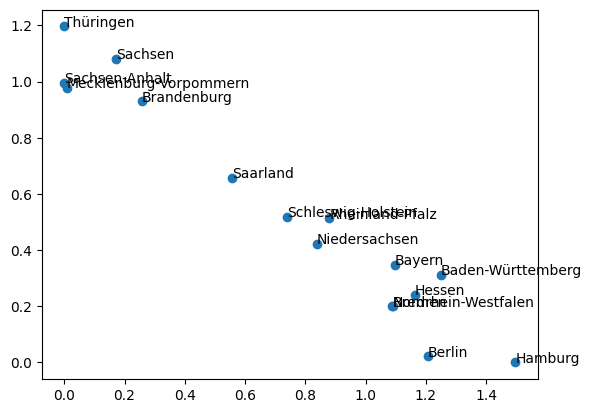

In [83]:
from sklearn.preprocessing import MinMaxScaler

df_ = MinMaxScaler().fit_transform(df.T).T
method = NMF(n_components=2, max_iter=10_000)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

### Maps for different scaling combinations

PCA

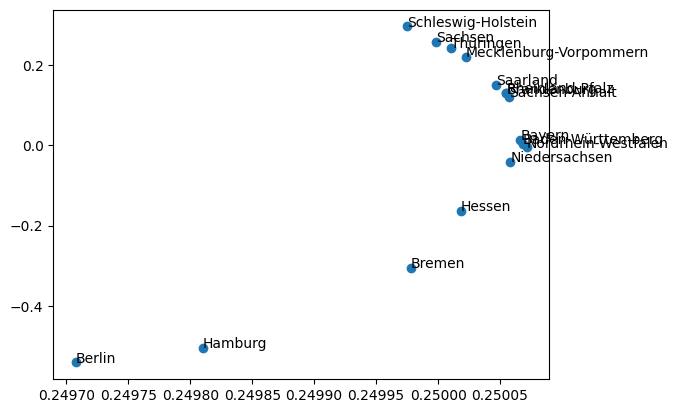

In [29]:
df_ = StandardScaler().fit_transform(df)
method = PCA(n_components=2)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

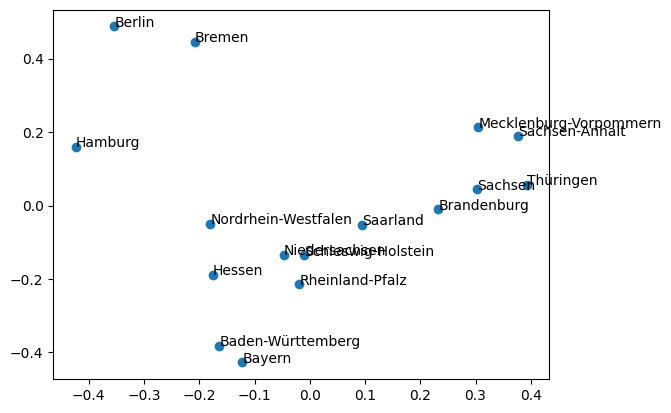

In [27]:
df_ = StandardScaler().fit_transform(df.T).T
method = PCA(n_components=2)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

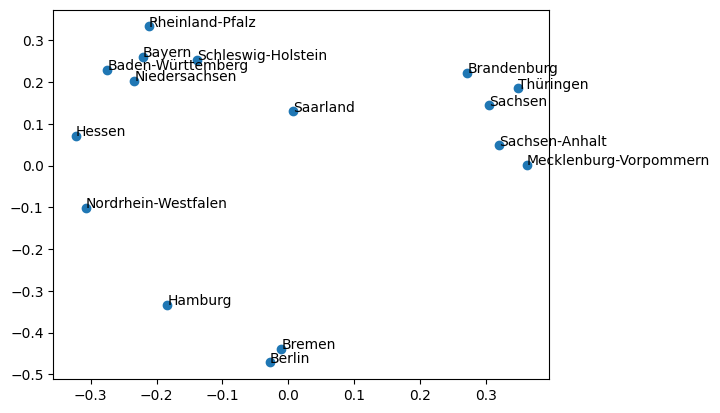

In [33]:
df_ = StandardScaler().fit_transform(df.T).T
df_ = StandardScaler().fit_transform(df_)
method = PCA(n_components=2)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

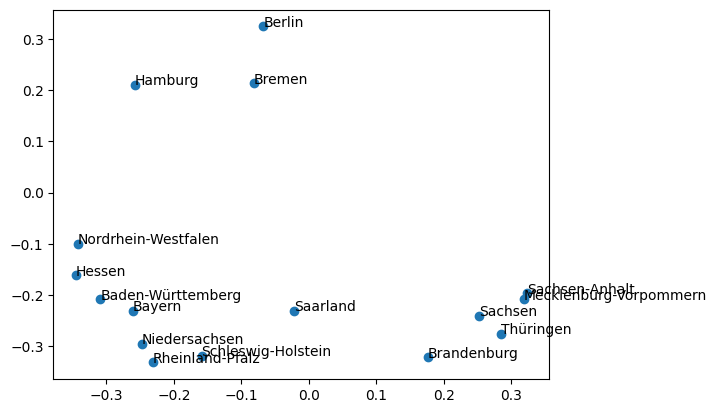

In [44]:
df_ = MinMaxScaler().fit_transform(df.T).T
df_ = StandardScaler().fit_transform(df_)
method = PCA(n_components=2)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

NMF

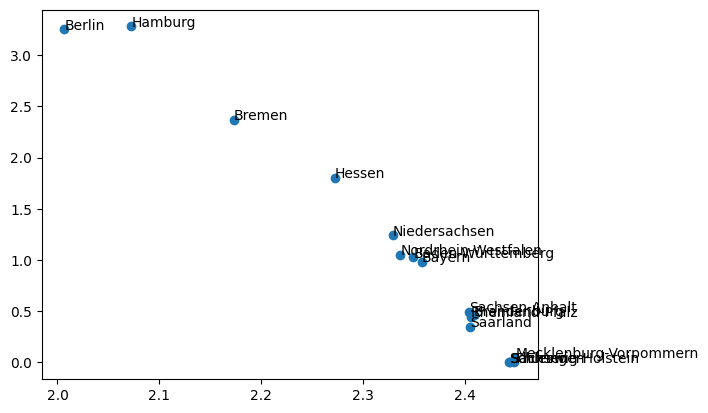

In [30]:
df_ = df / df.mean()
method = NMF(n_components=2, max_iter=10_000)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

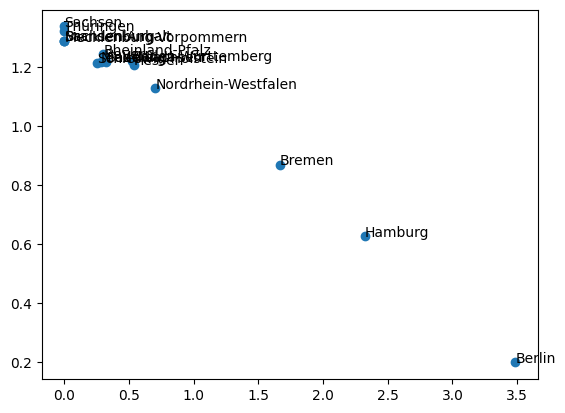

In [34]:
df_ = (df.T / df.T.mean()).T
method = NMF(n_components=2, max_iter=10_000)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

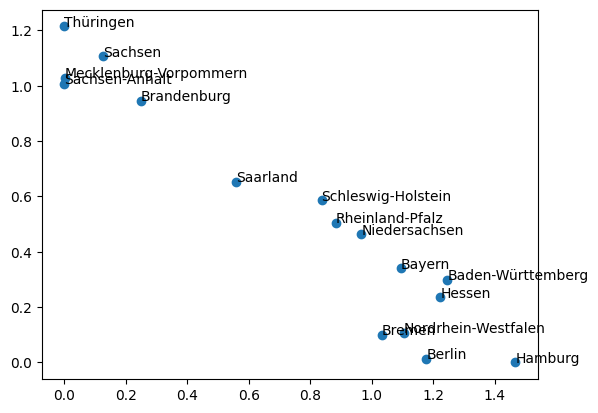

In [39]:
df_ = MinMaxScaler().fit_transform(df.T).T
df_ = MinMaxScaler().fit_transform(df_)
method = NMF(n_components=2, max_iter=10_000)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()

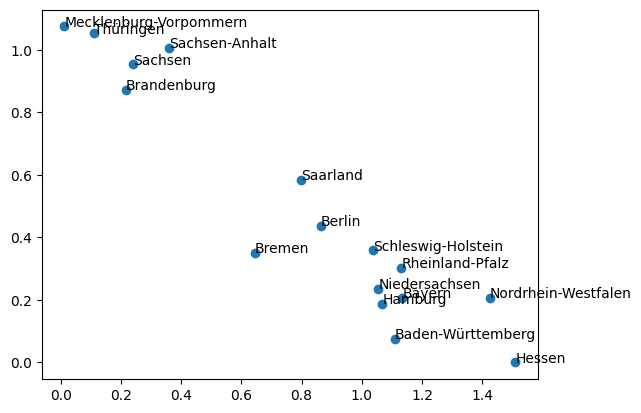

In [36]:
df_ = StandardScaler().fit_transform(df.T).T
df_ = MinMaxScaler().fit_transform(df_)
method = NMF(n_components=2, max_iter=10_000)
comp = method.fit(df_).components_
plt.scatter(comp[0], comp[1])
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (comp[0][i], comp[1][i]))
plt.show()